In [ ]:
!pip install -q pandas
!pip install -q numpy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q sklearn
!pip install -q imblearn
!pip install -q xgboost
!pip install -q catboost
!pip install -q lightgbm
!pip install -q pandas_profiling
!pip install -q shap

In [ ]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shap
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#import squarify
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

import urllib, os, pickle
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler,LabelEncoder
from sklearn import compose
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import NearMiss
 ##Profiling
#import pandas_profiling
#from pandas_profiling import ProfileReport
# Models
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import *
import catboost
import lightgbm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import catboost
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn import tree
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.dummy import DummyRegressor
from sklearn.base import clone
from sklearn.utils import all_estimators
# Setup reproductibility
np.random.seed(0)

In [ ]:
#moounting and accessing my folder named 'file'
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/files

Mounted at /content/gdrive/
/content/gdrive/MyDrive/files


In [ ]:
#checking for files in my folder
for file in os.listdir():
  print(file)

Test2.csv
Train2.csv
uploaded1
uploaded
train_label1.csv
eval_label1.csv
flagged
test.csv
train.csv
VariableDefinitions.csv
SampleSubmission1.csv
Test3.csv
Train3.csv
StarterNotebook.ipynb
ml_cp.pkl
ml_com.pkl
Capstone_Project_Customer_Churn4.ipynb
Variable_Definitions.csv
Trainc.csv
Testc.csv
SampleSubmissionc.csv
compete_sub.csv
compete2_sub.csv
compete3_sub.csv
compete4_sub.csv
compete5_sub.csv
compete6_sub.csv
Capstone_Project_Customer_Churn_L.ipynb
compete7_sub.csv
catboost_info
compete8_sub.csv
compete9_sub.csv
compete10_sub.csv
predicts_sub.csv
predicted_sub.csv
predicted1_sub.csv
predicted2_sub.csv
predicted3_sub.csv
predicted3_1_sub.csv
ml_comps.pkl
ml_comps_1.pkl


# Data reading

In [ ]:
Train = pd.read_csv('Train3.csv')
Test = pd.read_csv('Test3.csv')
submission = pd.read_csv('SampleSubmission1.csv')
variable= pd.read_csv('VariableDefinitions.csv')

In [ ]:
# variable definitions
variable

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [ ]:
Train

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0


In [ ]:
Test

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,DAKAR,F 9-12 month,500.0,1.0,506.0,169.0,1.0,0.0,26.0,NaN,NaN,6.0,NaN,NO,14,All-net 500F=2000F;5d,1.0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,5.0,0.0,8.0,54.0,NaN,NaN,NaN,NO,29,All-net 500F =2000F_AllNet_Unlimited,3.0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,NaN,K > 24 month,300.0,2.0,298.0,99.0,2.0,0.0,1.0,2.0,NaN,NaN,NaN,NO,12,NaN,NaN


In [ ]:
submission

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0
...,...,...
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,0
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,0


# Exploring Data

##TRAIN DATA

In [ ]:
#checking for Train misssing values in percentage
null_values=pd.isnull(Train).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/Train.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values


,Missing Data,Percentage
Columns,,
ZONE2,1008230,93.612584
ZONE1,992126,92.117353
TIGO,644774,59.866261
DATA_VOLUME,529763,49.187669
FREQ_TOP_PACK,450895,41.864898
TOP_PACK,450895,41.864898
ORANGE,447144,41.516624
REGION,424337,39.399029
ON_NET,393174,36.505593


From the dataset preview and the info above, we make the following observations:

* Out of the 18 columns, only 5 have no missing values. The columns therefore have to be assessed, and necessary action taken on the columns to deal with the missing values.
* Given the extent of missing values for zone1 and zone2 (over 90% each),and tigo, they will be dropped.

In [ ]:
# Looking at the descriptive statistics of the columns with numeric values
numerics = [column for column in Train.columns if (Train[column].dtype != "O")]
print("Summary table of the Descriptive Statistics of Columns with Numeric Values")
Train[numerics].describe().T

Summary table of the Descriptive Statistics of Columns with Numeric Values


,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


To ensure that our actions on the missing values do not skew the data further or enforce any existing biases in the data, we will check for the distribution in the columns before making a final determination.

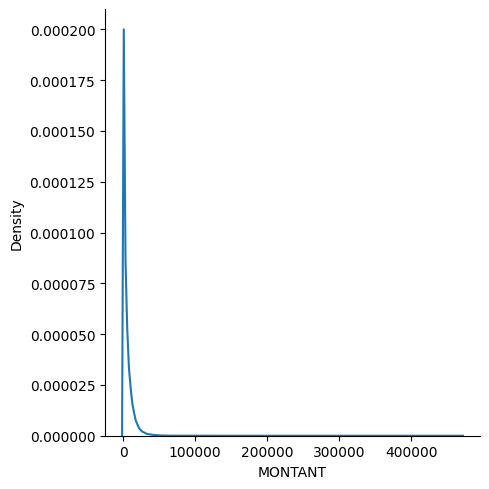

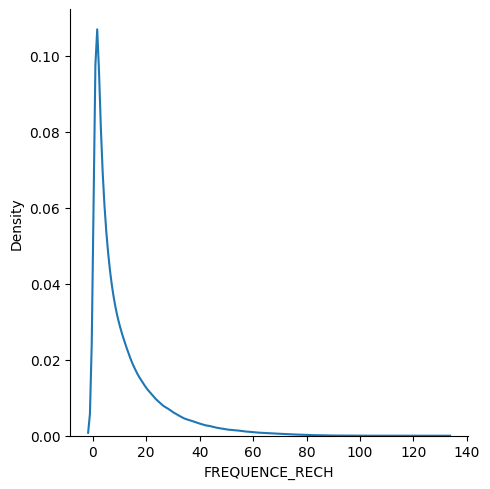

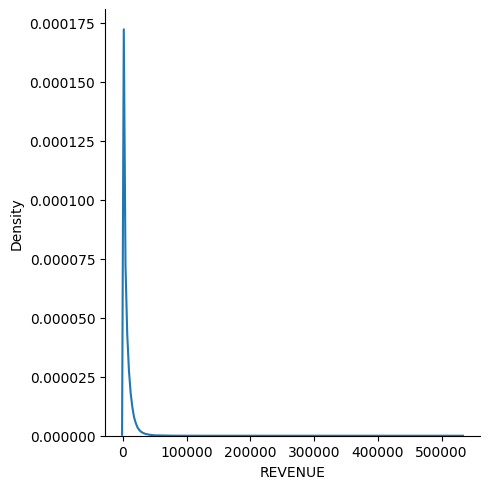

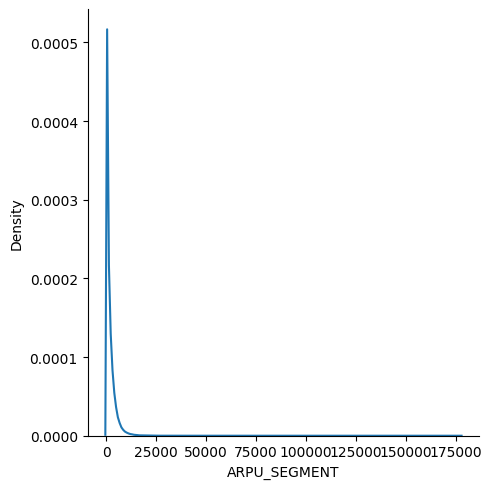

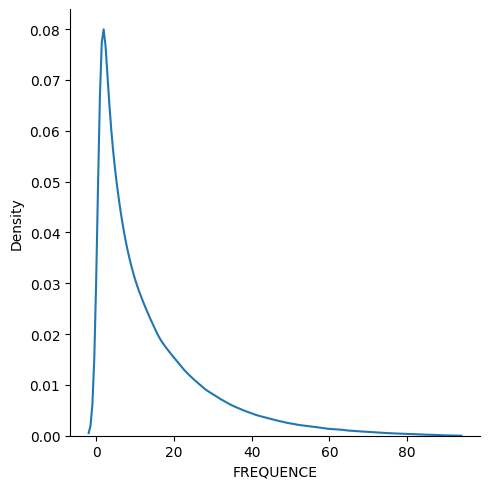

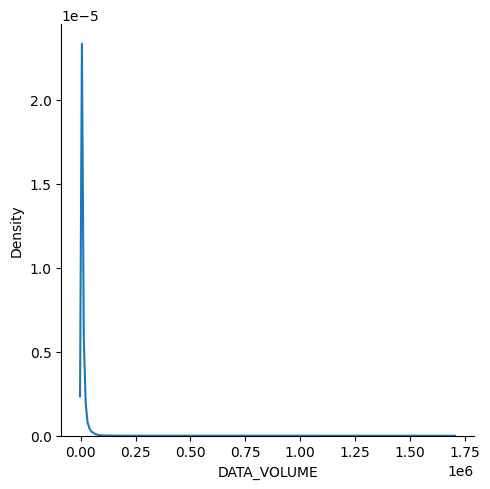

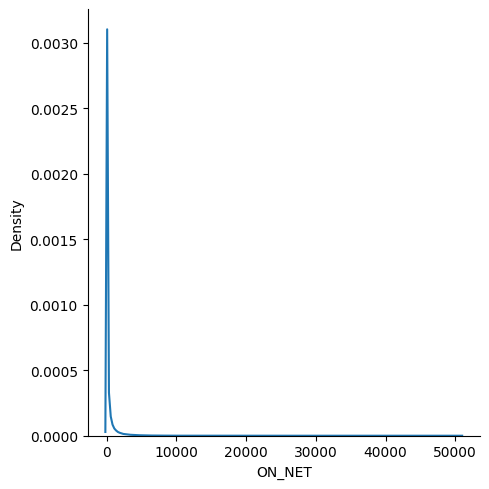

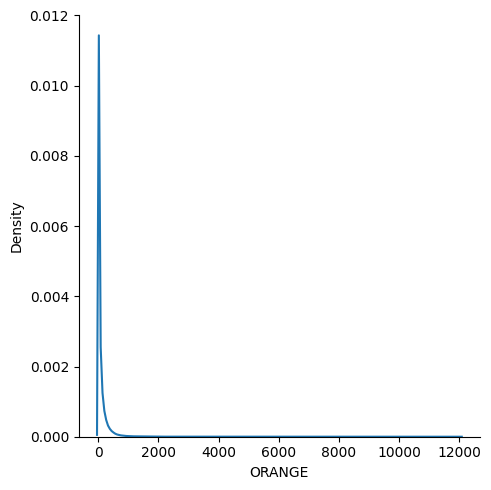

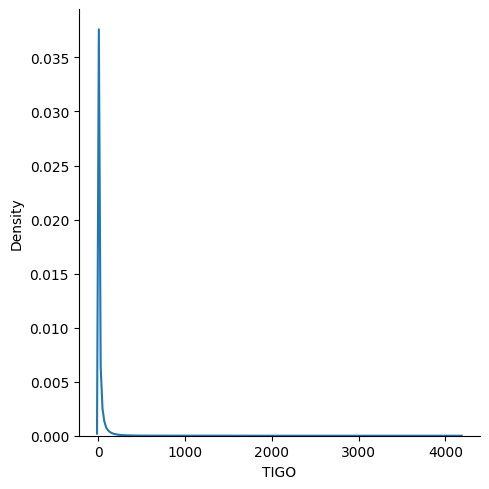

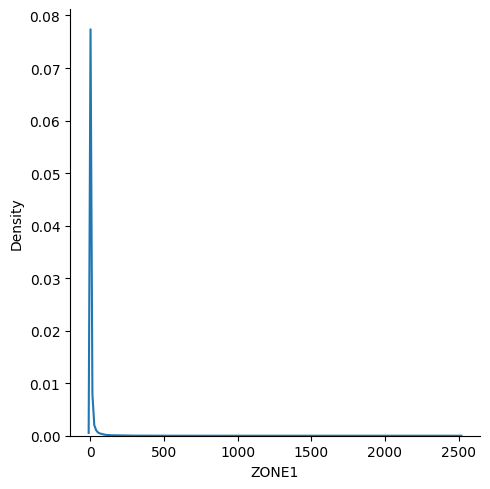

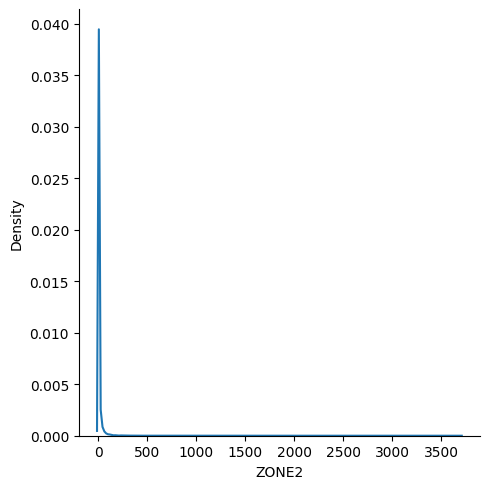

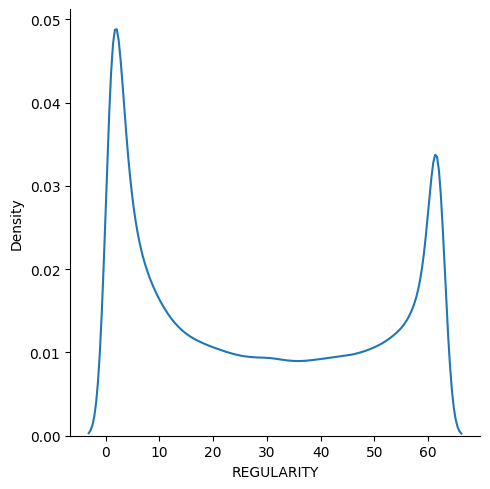

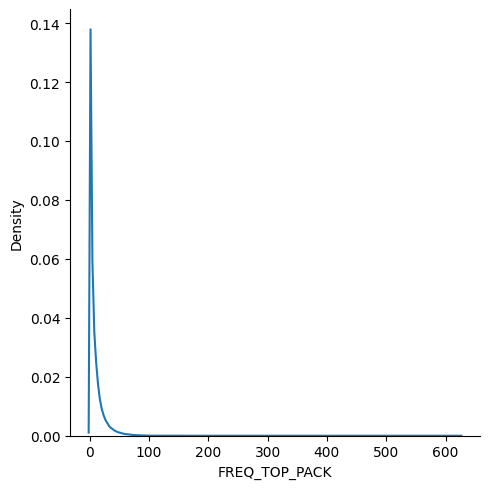

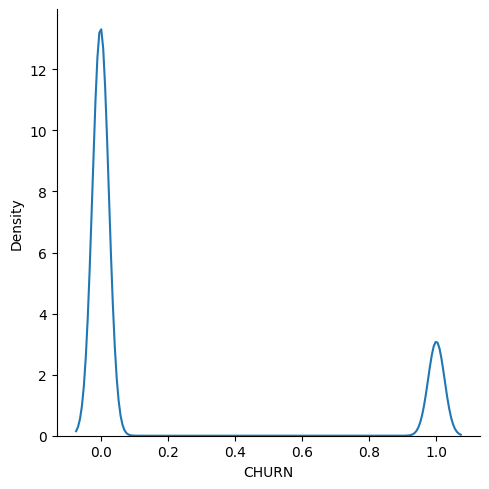

In [ ]:
for columns in Train[numerics]:
  sns.displot(Train[columns],kind="kde")
  plt.show()

I will use maen value to replace the missing values in a case where the distribution is symmetric... And also median or mode with skewed data

In [ ]:
# Filling the Train numeric columns with the mean values
Train["MONTANT"].fillna((Train["MONTANT"].median()), inplace=True)
Train["FREQUENCE_RECH"].fillna((Train["FREQUENCE_RECH"].median()), inplace=True)
Train["ARPU_SEGMENT"].fillna((Train["ARPU_SEGMENT"].median()), inplace=True)
Train["FREQUENCE"].fillna((Train["FREQUENCE"].median()), inplace=True)
Train["DATA_VOLUME"].fillna((Train["DATA_VOLUME"].median()), inplace=True)
Train["FREQ_TOP_PACK"].fillna((Train["FREQ_TOP_PACK"].median()), inplace=True)
Train["REVENUE"].fillna((Train["REVENUE"].mean()), inplace=True)
Train["ORANGE"].fillna((Train["ORANGE"].median()), inplace=True)
Train["ON_NET"].fillna((Train["ON_NET"].median()), inplace=True)

In [ ]:
# checking for Train misssing values in percentage
null_values=pd.isnull(Train).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/Train.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
ZONE2,1008230,93.612584
ZONE1,992126,92.117353
TIGO,644774,59.866261
TOP_PACK,450895,41.864898
REGION,424337,39.399029
user_id,0,0.000000
ORANGE,0,0.000000
FREQ_TOP_PACK,0,0.000000
REGULARITY,0,0.000000


## TEST DATA

In [ ]:
#checking for Test misssing values in percentage
#\\
null_values=pd.isnull(Test).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/Test.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
ZONE2,178052,93.680516
ZONE1,175213,92.186801
TIGO,113508,59.721250
DATA_VOLUME,93347,49.113715
FREQ_TOP_PACK,79290,41.717746
TOP_PACK,79290,41.717746
ORANGE,78646,41.378911
REGION,74733,39.320120
ON_NET,69292,36.457385


There are a lot of missing values which some of them would be filled with their mean

Those with missoing values above 50% will be dropped

In [ ]:
# Filling the Test numeric columns with the mean values
Test["MONTANT"].fillna((Train["MONTANT"].median()), inplace=True)
Test["FREQUENCE_RECH"].fillna((Test["FREQUENCE_RECH"].median()), inplace=True)
Test["ARPU_SEGMENT"].fillna((Test["ARPU_SEGMENT"].median()), inplace=True)
Test["FREQUENCE"].fillna((Test["FREQUENCE"].median()), inplace=True)
Test["DATA_VOLUME"].fillna((Test["DATA_VOLUME"].median()), inplace=True)
Test["FREQ_TOP_PACK"].fillna((Test["FREQ_TOP_PACK"].median()), inplace=True)
Test["REVENUE"].fillna((Test["REVENUE"].mean()), inplace=True)
Test["ORANGE"].fillna((Test["ORANGE"].median()), inplace=True)
Test["ON_NET"].fillna((Test["ON_NET"].median()), inplace=True)

In [ ]:
#checking for Test misssing values in percentage
#\\
null_values=pd.isnull(Test).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/Test.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
ZONE2,178052,93.680516
ZONE1,175213,92.186801
TIGO,113508,59.721250
TOP_PACK,79290,41.717746
REGION,74733,39.320120
user_id,0,0.000000
REGULARITY,0,0.000000
MRG,0,0.000000
ORANGE,0,0.000000


# VISUALIZATIONS

In [ ]:
#copying train data for visualization
df = Train.copy()
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.000000,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,NaN,NaN,NaN,NO,3,NaN,5.0,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,NaN,NaN,NaN,NO,1,NaN,5.0,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.000000,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.000000,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,NaN,NaN,NaN,NO,16,NaN,5.0,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.000000,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,NaN,NaN,NaN,NO,3,NaN,5.0,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.000000,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0


In [ ]:
# replacing 0 with 'Yes'
df['CHURN']= df['CHURN'].replace(0,'No')
df['CHURN']= df['CHURN'].replace(1,'Yes')
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.000000,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,No
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,NaN,NaN,NaN,NO,3,NaN,5.0,No
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,NaN,NaN,NaN,NO,1,NaN,5.0,No
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.000000,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,No
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.000000,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,NaN,NaN,NaN,NO,16,NaN,5.0,No
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.000000,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,No
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,NaN,NaN,NaN,NO,3,NaN,5.0,Yes
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.000000,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,No


### What is the total percentage/ number of those who churn?

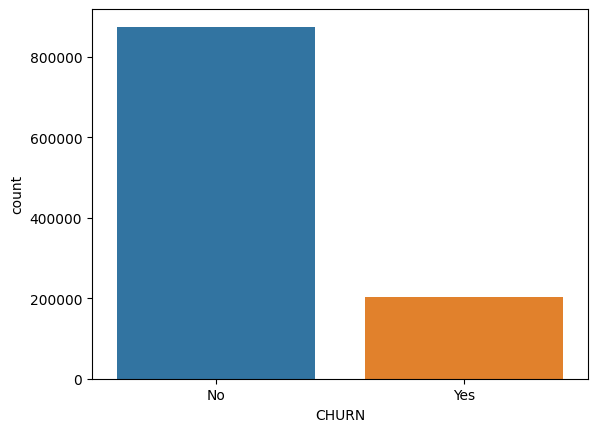

In [ ]:
#churn count
sns.countplot(data=df, x='CHURN')

#Churn percentage
fig1 = go.Figure(
    data=go.Pie(values=df['CHURN'].value_counts().values,labels=df['CHURN'].value_counts().index,title='percentage of those who churn'))
fig1.show()
plt.show()
rcParams['figure.figsize'] = 15,8

#plt.tight_layout

We are having those who don't churn to have a percentage of 18.8(201,993) and those who churn to be 81.2(875,031)...which means our data is not balanced

In [ ]:
def tenure_group_counts(df):
    plt.figure(figsize = (13,10))
    t = sns.countplot(data = df, x = 'TENURE', hue = 'CHURN')
    t.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()

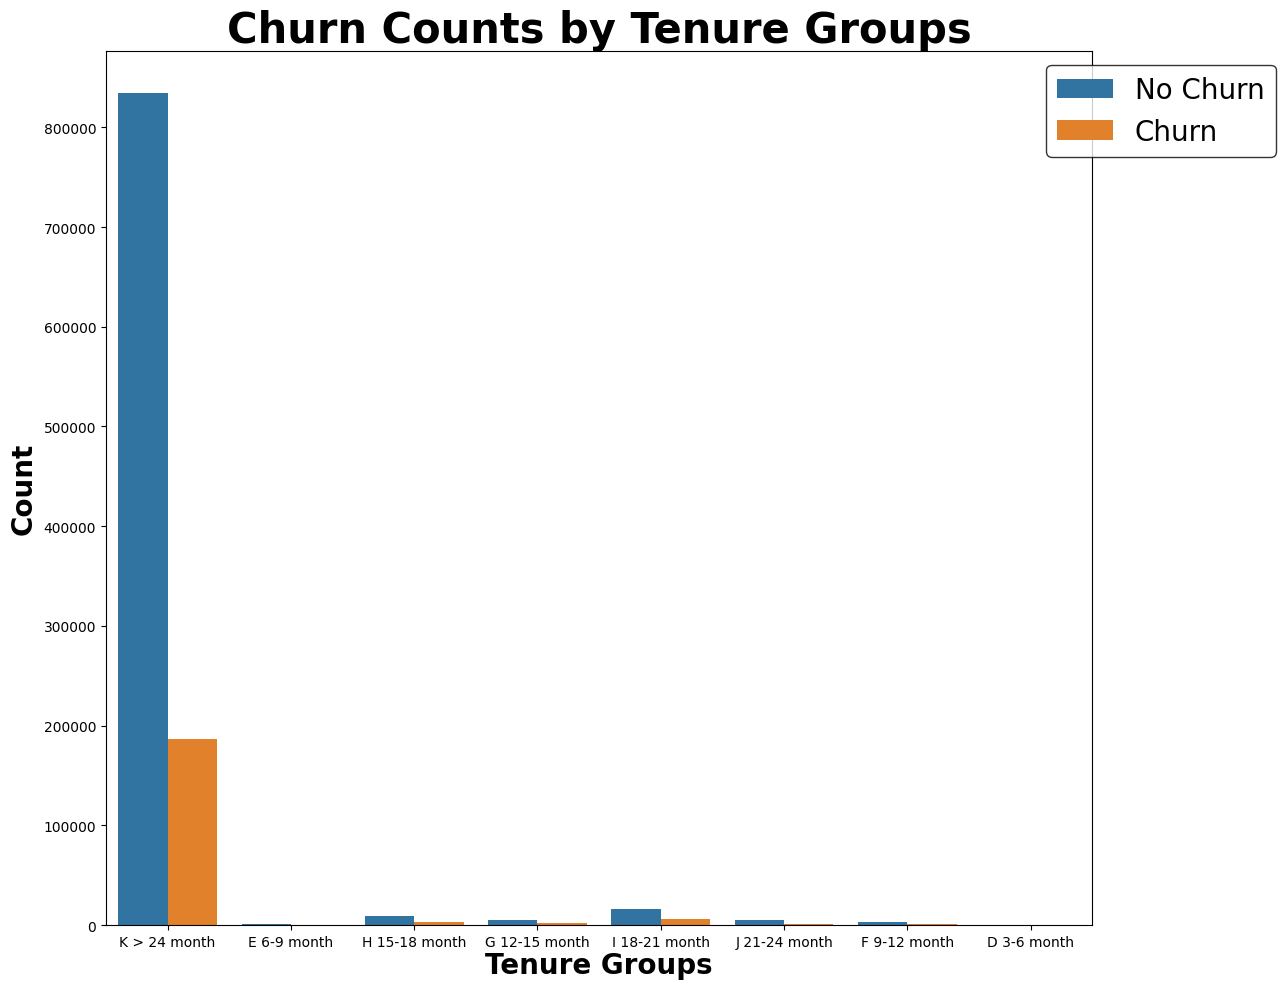

In [ ]:
tenure_group_counts(df)

**Customers with shorter service tenures (newer clients) are more likely to churn than those with longer tenures....so most of the people who left service had less tenure**



In [ ]:
def plot_montant_averages(df):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = df, x = 'TENURE', y = 'MONTANT', hue = 'CHURN')
    b.set_ylabel(f' ($)', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average MONTANT by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left',labels = ['No Churn', 'Churn'], edgecolor = 'black')
    plt.tight_layout()



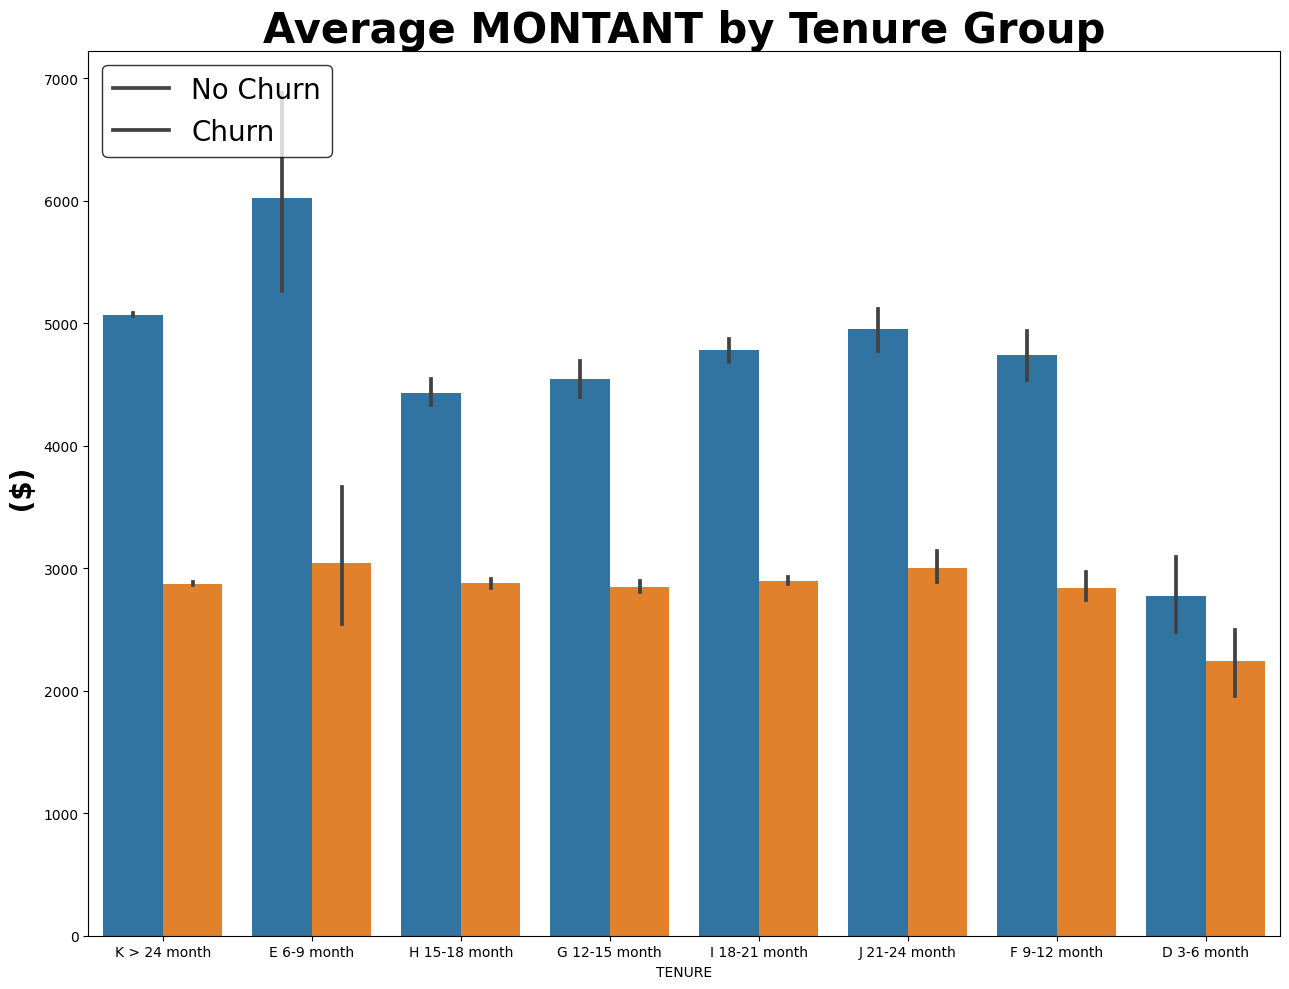

In [ ]:
plot_montant_averages(df)

**Those who have been staying with the company between 6-9 months Churn most, and they are also the people with high top-up-amount**

In [ ]:
def plot_revenue_averages(df):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = df, x = 'TENURE', y = 'REVENUE', hue = 'CHURN')
    b.set_ylabel(f' REVENUE ($)', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average REVENUE by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left',labels = ['No Churn', 'Churn'], edgecolor = 'black')
    plt.tight_layout()

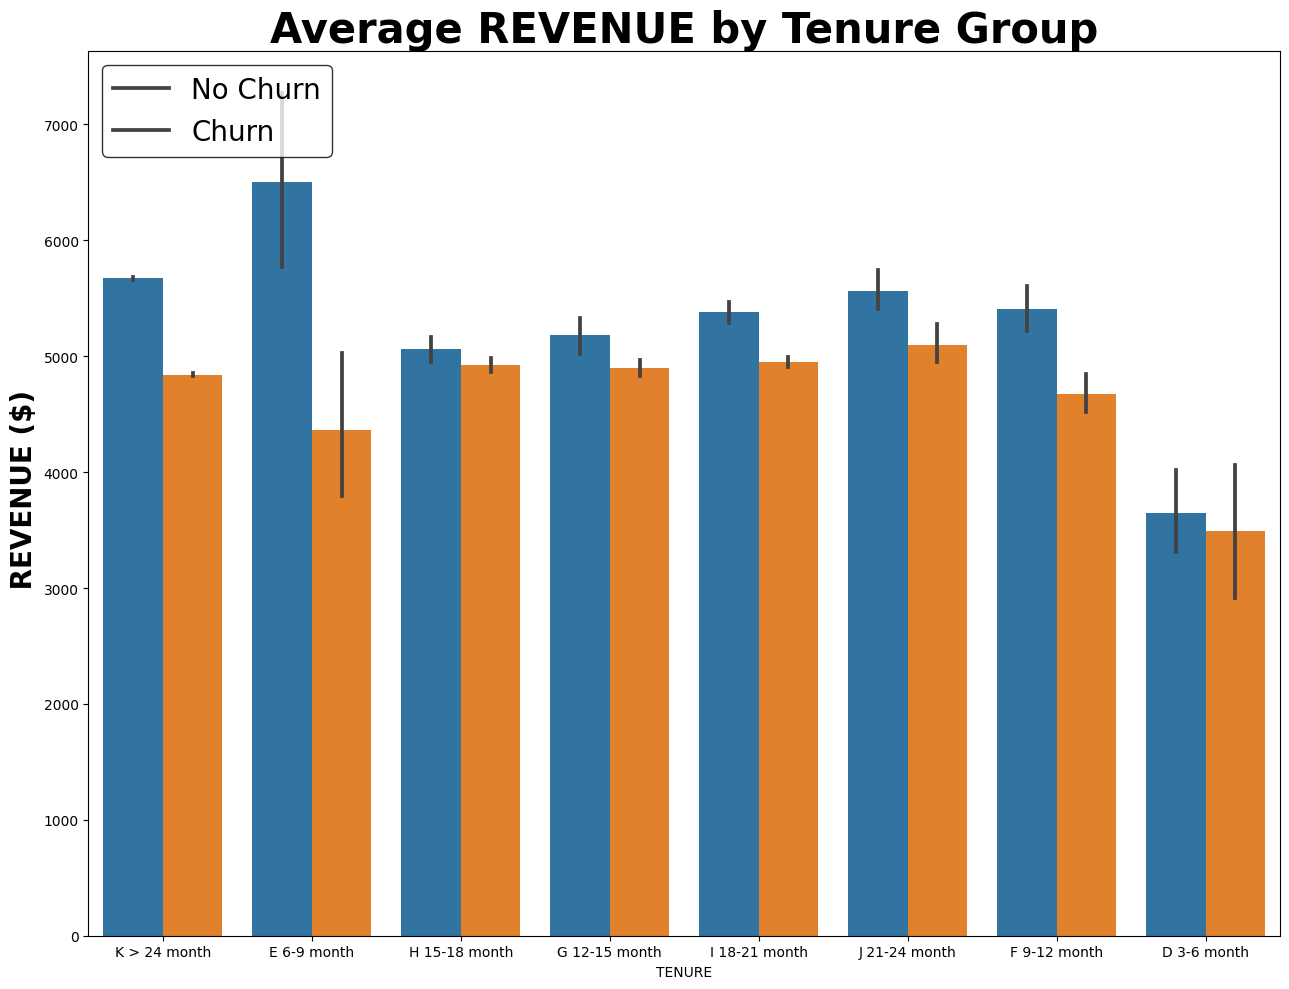

In [ ]:
plot_revenue_averages(df)

**INTERESTING! Tenure group between 6-9 months are those with highh revenue. No wonder their top-up-amount is also high...They are those who churn most also**

In [ ]:

def plot_refilled_averages(df):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = df, x = 'TENURE', y = 'FREQUENCE_RECH', hue = 'CHURN')
    b.set_ylabel(f' Times the customer refilled ', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average times the customer refilled by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left',labels = ['No Churn', 'Churn'], edgecolor = 'black')
    plt.tight_layout()

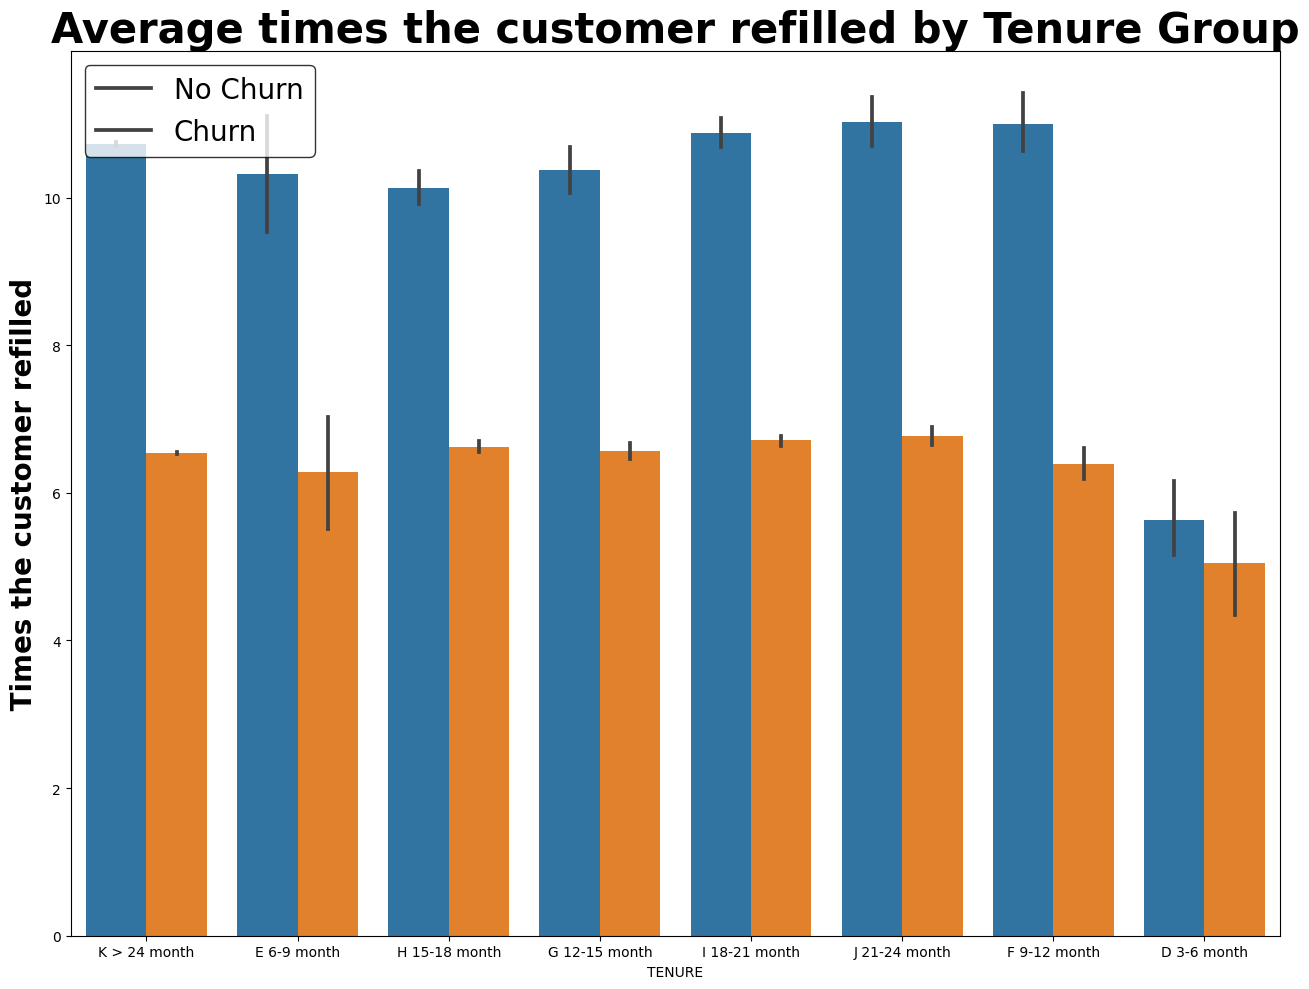

In [ ]:
plot_refilled_averages(df)

**Those with Tenure between 9-12 refilled frequently with respect to those who don't churn**

In [ ]:
def plot_re_mon_averages(df):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = df, x = 'REGION', y = 'REVENUE', hue = 'CHURN')
    b.set_ylabel(f' REVENUE ', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average REVENUE by REGION', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left', edgecolor = 'black')
    plt.tight_layout()

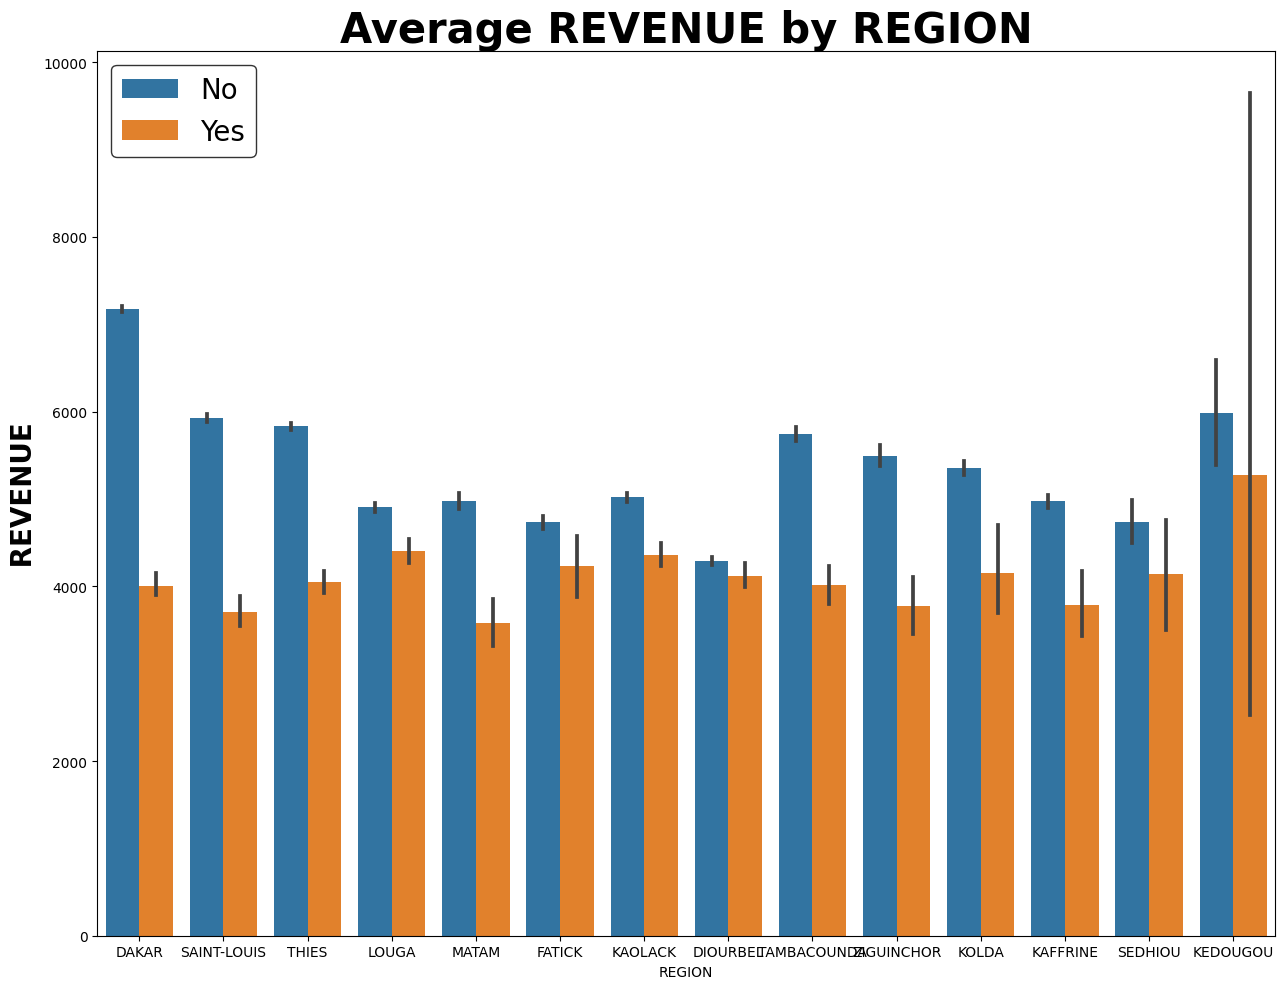

In [ ]:
plot_re_mon_averages(df)

**The highest Revenue is coming from DAKAR with respect to those who don't churn...And respect to those who churn, the highest Revenue is coming from KEDOUGOU**

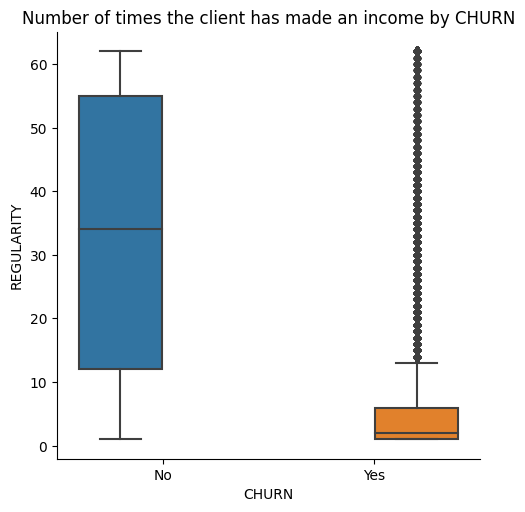

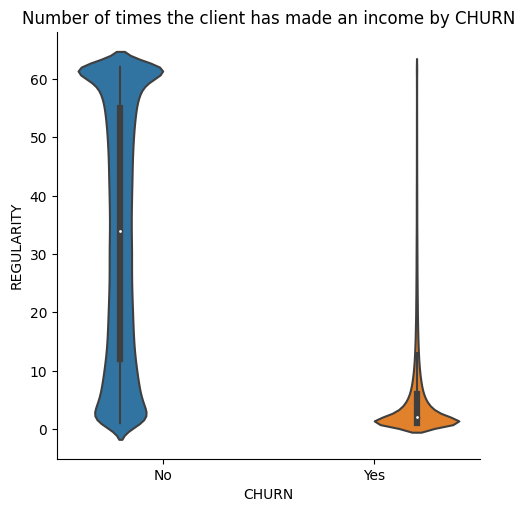

In [ ]:
sns.catplot(data= df, x='CHURN',y='REGULARITY',kind='box', hue='CHURN').set(title='Number of times the client has made an income by CHURN')
sns.catplot(data= df, x='CHURN',y='REGULARITY',kind='violin', hue='CHURN').set(title='Number of times the client has made an income by CHURN')

**It can be seen that client churn when the Number of times a he or she  has made an income is between 0-10**

# FEATURE ENGINEERING

## Dropping unwanted features


In [ ]:
Train.drop(columns=['user_id','REGION', 'MRG', 'TOP_PACK','TIGO','ZONE1','ZONE2'], inplace=True)
Test.drop(columns=['user_id','REGION', 'MRG', 'TOP_PACK','TIGO','ZONE1','ZONE2'], inplace=True)

* Due to the low variability of the "mrg" column, it will be dropped.
* For the opposite reason - too much variability - the "top_pack" column will also be dropped
* The "region" column is also a big risk since it is likely to add a lot of dimensionality to the work, and may cause a significant slowdown in training. It will also be dropped.
* The above will be dropped along with the "user_id" which is unique for every user, and will not provide any useful information to the models.

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   TENURE          1077024 non-null  object 
 1   MONTANT         1077024 non-null  float64
 2   FREQUENCE_RECH  1077024 non-null  float64
 3   REVENUE         1077024 non-null  float64
 4   ARPU_SEGMENT    1077024 non-null  float64
 5   FREQUENCE       1077024 non-null  float64
 6   DATA_VOLUME     1077024 non-null  float64
 7   ON_NET          1077024 non-null  float64
 8   ORANGE          1077024 non-null  float64
 9   REGULARITY      1077024 non-null  int64  
 10  FREQ_TOP_PACK   1077024 non-null  float64
 11  CHURN           1077024 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 98.6+ MB


# 1st Approach - Unbalanced dataset

### Defining variables for the columns in the dataframe to perform a train test split.

In [ ]:
num_cols = Train.select_dtypes(include=np.number).columns.tolist()
cat_cols = Train.select_dtypes(exclude=np.number).columns.tolist()

print( f"Numeric features : {len(num_cols)}" )
print( f"Categorical features : {len(cat_cols)}" )

Numeric features : 11
Categorical features : 1


In [ ]:
columns = ['TENURE','MONTANT', 'FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','ORANGE','REGULARITY','FREQ_TOP_PACK']
numerical_columns = ['MONTANT', 'FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','ORANGE','REGULARITY','FREQ_TOP_PACK']
categorical_columns = ['TENURE']

### Splitting Data into Predictor and Response Variable

In [ ]:
X = Train.drop(['CHURN'], axis=1)
y = Train.CHURN

### Splitting Data into Train and Test data

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=0.2, random_state=42,stratify=y)
(X_train.shape, y_train.shape) , ( X_eval.shape,  y_eval.shape)

(((861619, 11), (861619,)), ((215405, 11), (215405,)))

In [ ]:
 # Pipeline for the Numeric features
num_transformer = Pipeline(
     steps=[("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())]
 )

 # Pipeline for the Categorical features
encoder_categories = [ Train[categorical_columns[i] ].append( Test[categorical_columns[i] ] ).dropna().unique() for i in range(len(categorical_columns)) ]

cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", preprocessing.OneHotEncoder(categories=encoder_categories, drop="first", sparse=False)) #if_binary

            ])

 # Associate the two pipelines
preprocessor = ColumnTransformer(
     transformers=[
         ("num", num_transformer, selector(dtype_include="number")),
         ("cat", cat_transformer, selector(dtype_exclude="number")),

     ]
 )
X_train__, X_eval__ = preprocessor.fit_transform(X_train), preprocessor.transform(X_eval)
 # New categorical feature names
feature_names_out = preprocessor.named_transformers_['cat'][-1].get_feature_names_out().tolist()
indexes = [ int(feature_names_out[i][1:feature_names_out[i].find("_")]) for i in range(len(feature_names_out))]
cat_cols_encoded = [  col.replace( f"x{i}", categorical_columns[i] )  for col,i in zip(feature_names_out, indexes)]

 # train df
df_X_train = pd.DataFrame(X_train__, columns=numerical_columns+cat_cols_encoded)

 # eval df
df_X_eval = pd.DataFrame(X_eval__, columns=numerical_columns+cat_cols_encoded)





In [ ]:
df_X_train.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,TENURE_E 6-9 month,TENURE_H 15-18 month,TENURE_G 12-15 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_F 9-12 month,TENURE_D 3-6 month
0,-0.280368,-0.269505,-0.000050,-0.278704,-0.270984,-0.170273,-0.224407,-0.243412,-1.124118,-0.258621,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.112111,0.280814,-0.034927,0.106775,0.384864,0.703120,-0.224407,-0.400177,-1.124118,-0.050070,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.706975,-0.819825,-0.855702,-0.697353,-0.926832,-0.183409,-0.248470,-0.381365,-0.630643,-0.675723,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.060918,-0.086066,-0.086546,0.056517,-0.270984,-0.170273,0.132291,-0.205788,0.894642,-0.050070,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.280368,-0.269505,-0.937745,-0.777766,-0.926832,-0.170273,-0.224407,-0.425259,-1.213840,-0.258621,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_X_eval.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,TENURE_E 6-9 month,TENURE_H 15-18 month,TENURE_G 12-15 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_F 9-12 month,TENURE_D 3-6 month
0,-0.758168,-0.819825,-0.000050,-0.278704,-0.270984,-0.170273,-0.224407,-0.243412,-1.213840,-0.258621,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.280368,-0.269505,-0.000050,-0.278704,-0.270984,-0.170273,-0.224407,-0.243412,-1.168979,-0.258621,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.852669,0.922853,1.536886,1.647687,1.368636,-0.170273,0.179002,0.251966,1.477839,1.618338,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.587525,-0.361225,-0.735885,-0.580252,0.384864,-0.170273,-0.245639,-0.400177,0.670335,-0.675723,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.263304,-0.086066,-0.411643,-0.262119,-0.189003,-0.170273,-0.162126,-0.118000,0.760058,-0.362896,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building

In [ ]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, df_X_train= df_X_train, X_eval= X_eval,
                                 y_train= y_train, y_eval= y_eval):

    # List to collect the results
    results = []

    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(df_X_train, y_train)

        # making predictions
        y_pred = model.predict(df_X_eval)

        # Append model performance results
        results.append([
        name,
        precision_score(y_eval, y_pred),
        recall_score(y_eval, y_pred),
        f1_score(y_eval, y_pred),
        accuracy_score(y_eval, y_pred),
        roc_auc_score(y_eval, y_pred)
        ])

        # Print Classification Report
        model_classification_report = classification_report(y_eval, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report, "\n")

        # Defining the Confusion Matrix
        model_confusion_matrix = pd.DataFrame(confusion_matrix(y_eval, y_pred)).reset_index(drop=True)
        print(f"{name} Confusion Matrix:", "\n", model_confusion_matrix, "\n")

        # Visualizing the Confusion Matrix
        # Display Confusion Matrix directly from predictions
        ConfusionMatrixDisplay.from_predictions(y_eval, y_pred)
        plt.show()
        print("\n")

        # Calculate and show the AUC and ROC
        fpr, tpr, thresholds = roc_curve(y_eval, y_pred)
        plt.plot(fpr, tpr)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        print("\n")

        print(f"{name} AUC score: {roc_auc_score(y_eval, y_pred)}")

        print("\n")
        print("----- ----- "*6)
        print("\n")
        print("----- ----- "*6)
        print("\n")

    # Put the results together
    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_score", "accuracy", "auc"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["auc","f1_score", "accuracy", "recall"], ascending = False, inplace = True)

    return eval_df

In [ ]:
# Define the models
log_reg_model = LogisticRegression(random_state=24)
dt_model = DecisionTreeClassifier(random_state=24)
rf_model = RandomForestClassifier(random_state=24)
xgb_model = XGBClassifier(random_state=24)
catb_model = CatBoostClassifier(metric_period=100, random_state=24)
lgb_model = lgb.LGBMClassifier(random_state=24)
ada = AdaBoostClassifier(random_state = 24)
# Create a dictionary of the models
unbalancedDt_models = {
    "Logistic Regressor": log_reg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "CatBoost": catb_model,
    "LightGBM": lgb_model,
    "ada_boost": ada

}

Logistic Regressor Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91    175006
           1       0.62      0.60      0.61     40399

    accuracy                           0.86    215405
   macro avg       0.76      0.76      0.76    215405
weighted avg       0.85      0.86      0.85    215405
 

Logistic Regressor Confusion Matrix: 
         0      1
0  159877  15129
1   16097  24302 



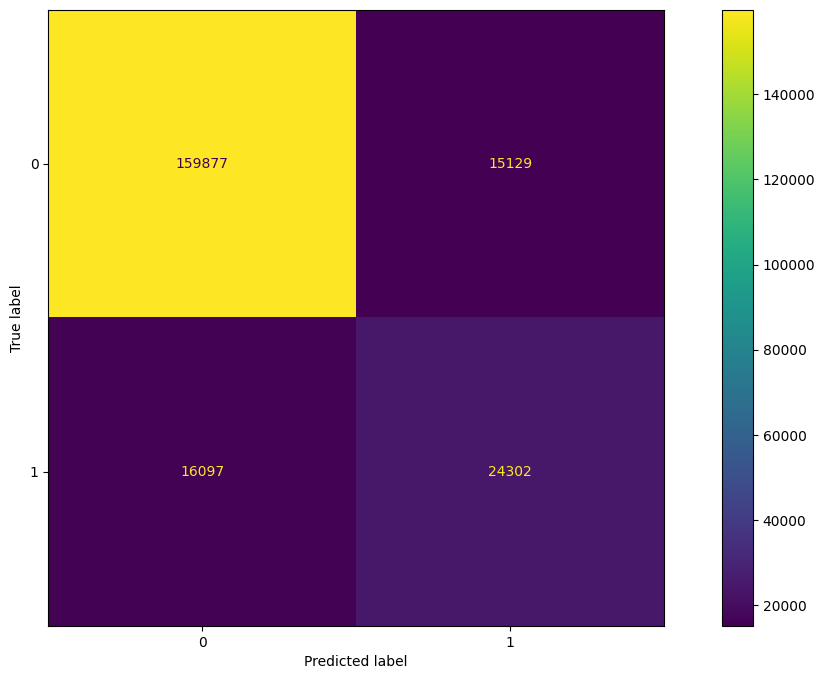

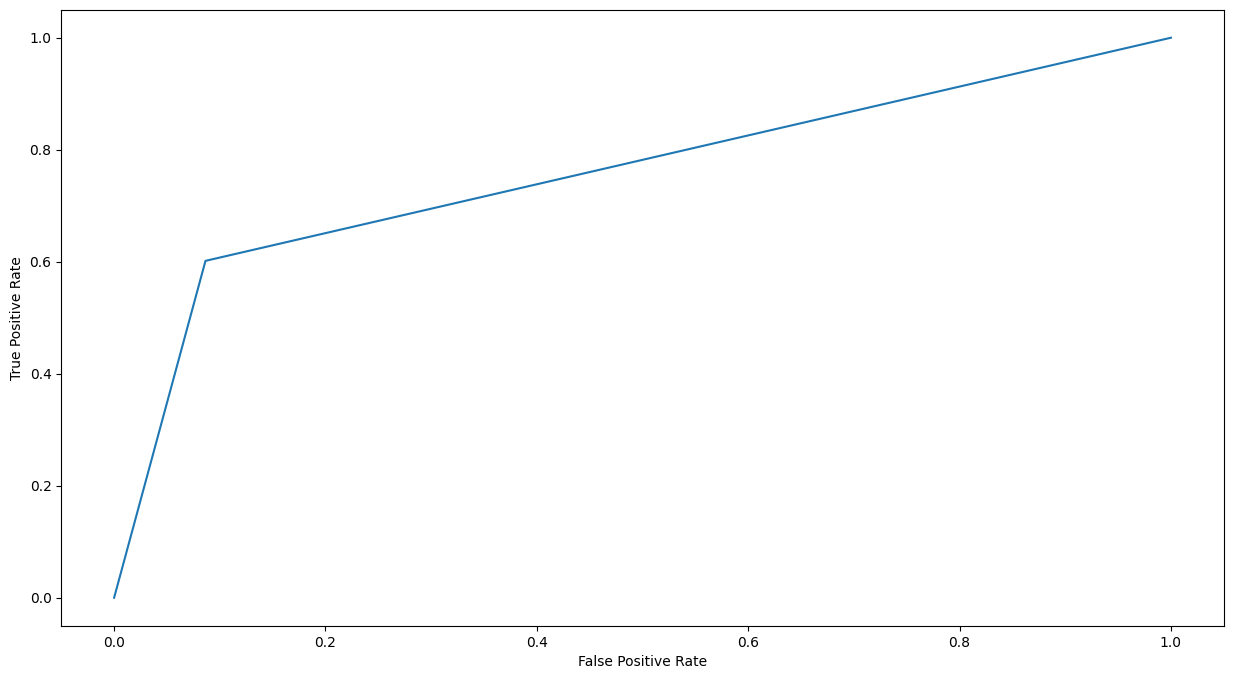



Logistic Regressor AUC score: 0.7575505393407286


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Decision Tree Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90    175006
           1       0.57      0.59      0.58     40399

    accuracy                           0.84    215405
   macro avg       0.74      0.74      0.74    215405
weighted avg       0.84      0.84      0.84    215405
 

Decision Tree Confusion Matrix: 
         0      1
0  157206  17800
1   16680  23719 



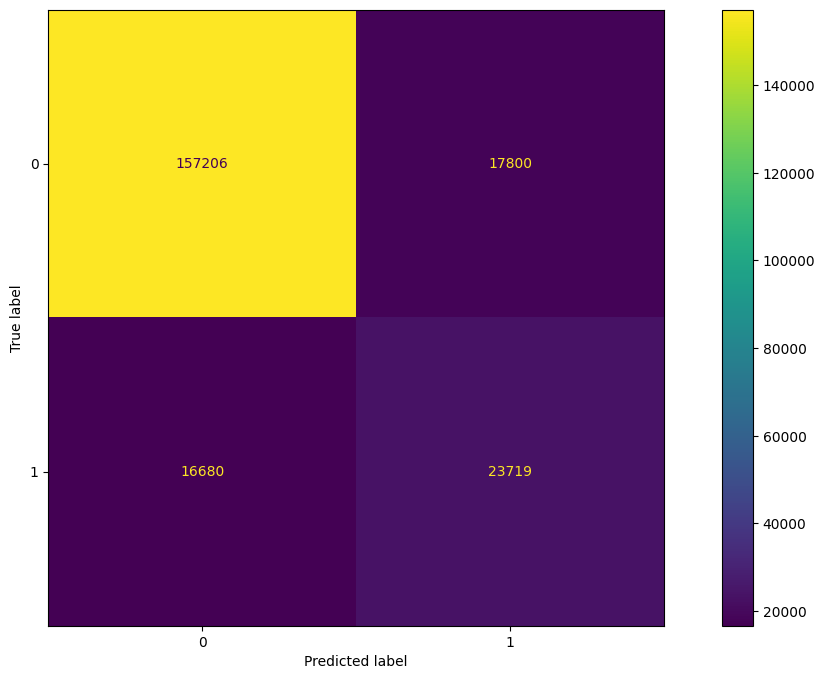

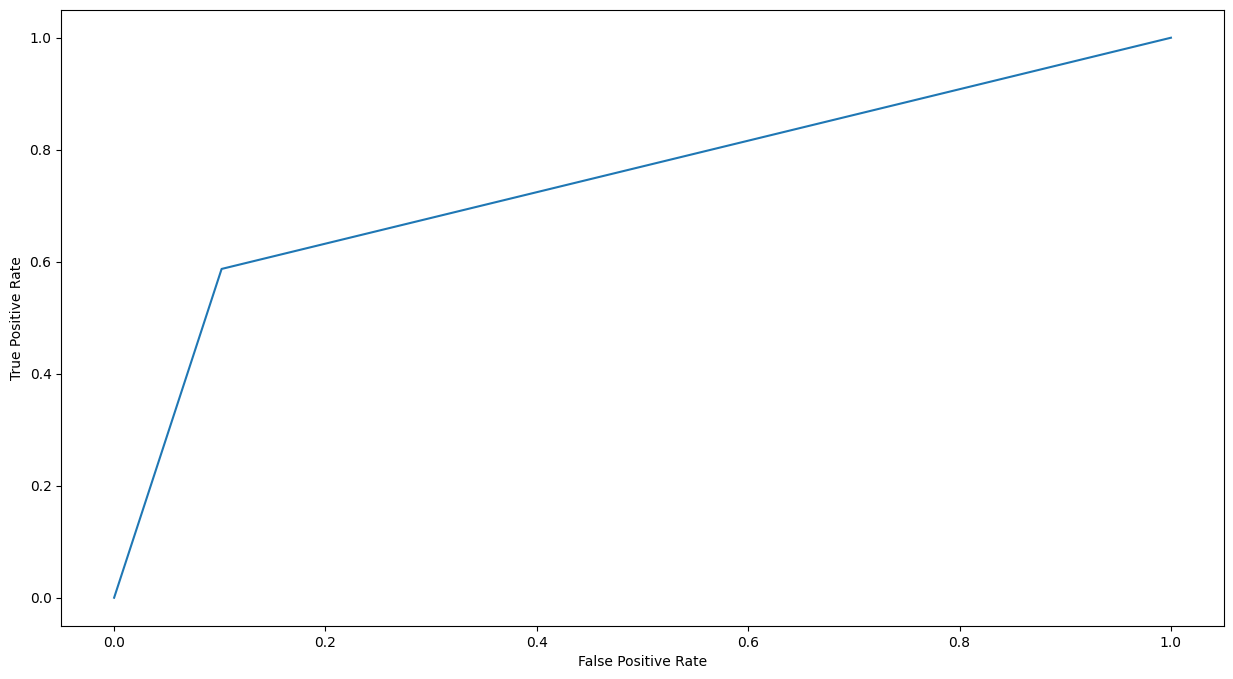



Decision Tree AUC score: 0.7427038472725483


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Random Forest Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92    175006
           1       0.65      0.57      0.61     40399

    accuracy                           0.86    215405
   macro avg       0.78      0.75      0.76    215405
weighted avg       0.86      0.86      0.86    215405
 

Random Forest Confusion Matrix: 
         0      1
0  162574  12432
1   17478  22921 



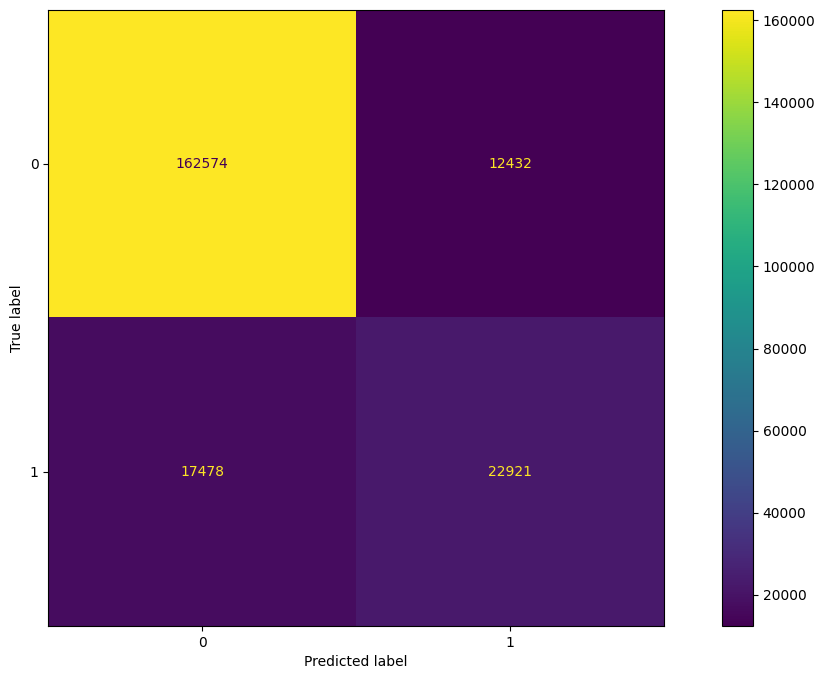

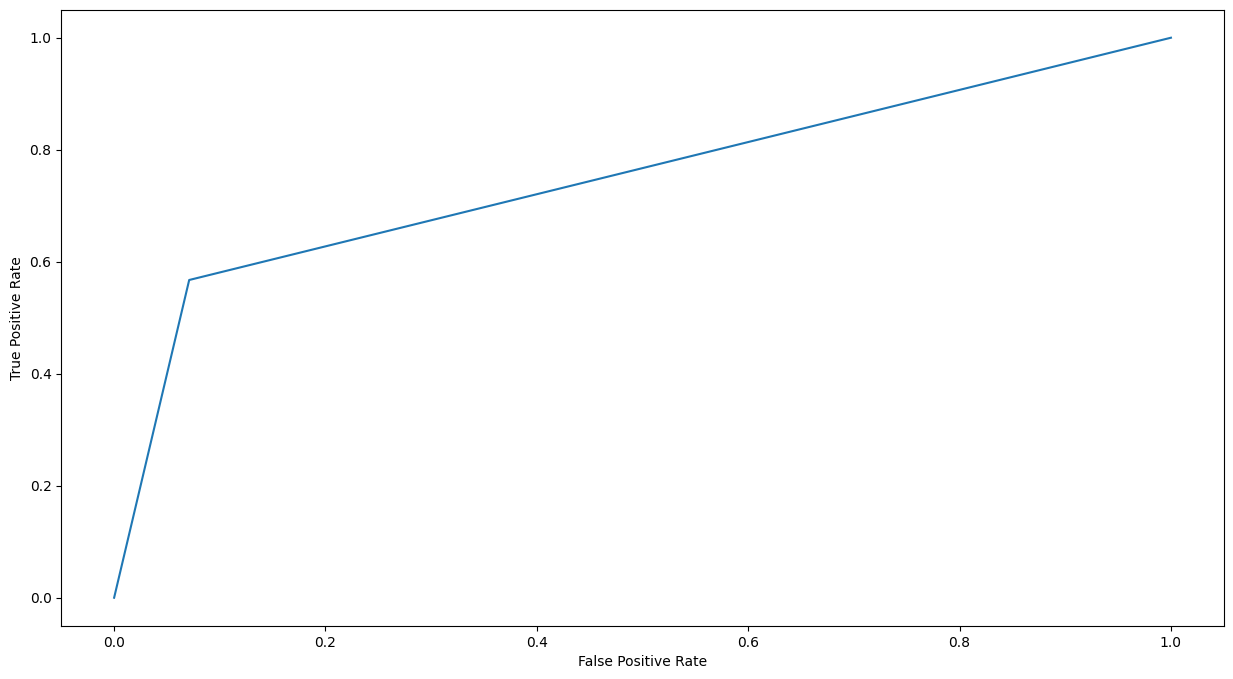



Random Forest AUC score: 0.7481639822116808


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92    175006
           1       0.67      0.56      0.61     40399

    accuracy                           0.87    215405
   macro avg       0.79      0.75      0.76    215405
weighted avg       0.86      0.87      0.86    215405
 

XGBoost Confusion Matrix: 
         0      1
0  163950  11056
1   17951  22448 



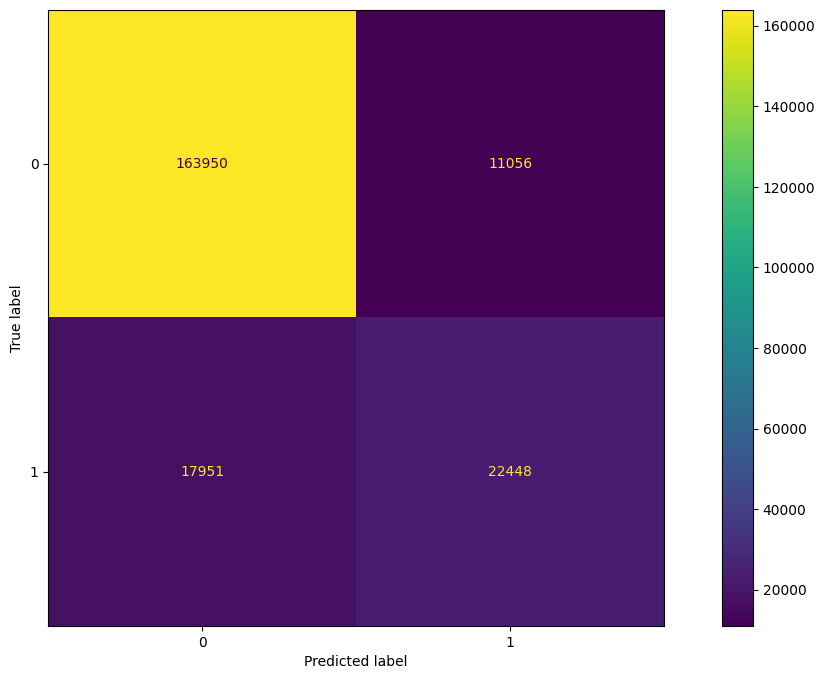

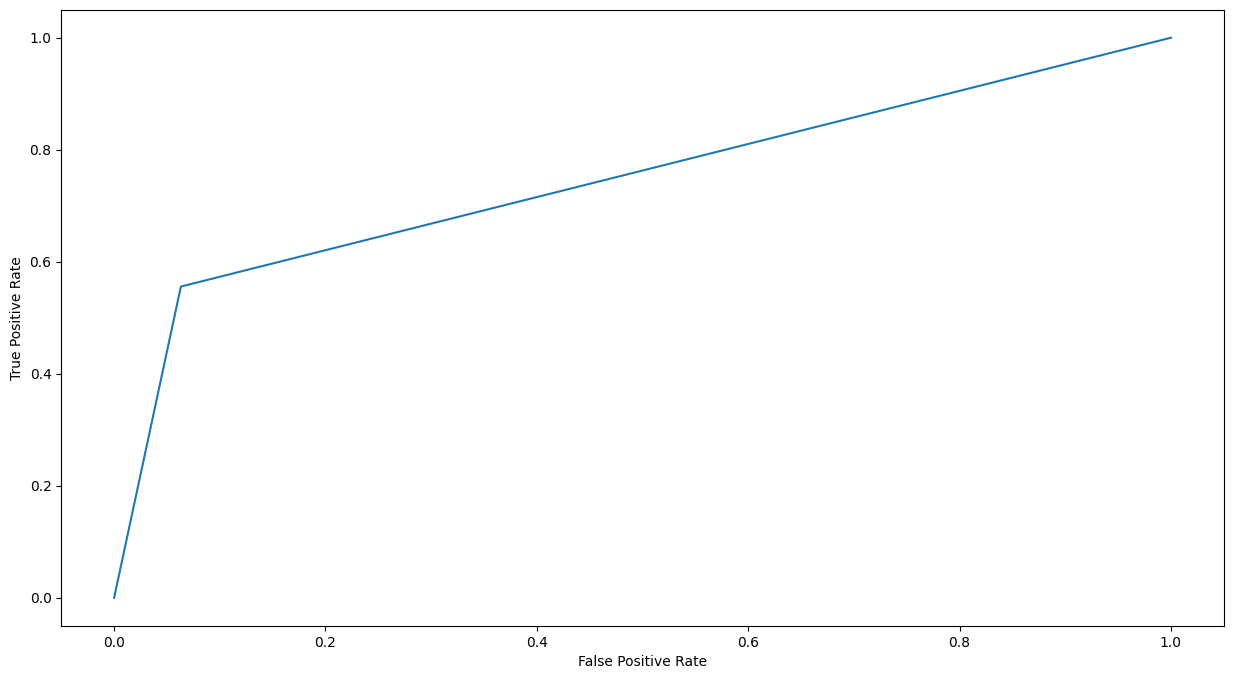



XGBoost AUC score: 0.7462411706962577


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Learning rate set to 0.184635
0:	learn: 0.5151020	total: 260ms	remaining: 4m 19s
100:	learn: 0.2936718	total: 22.3s	remaining: 3m 18s
200:	learn: 0.2923868	total: 43.1s	remaining: 2m 51s
300:	learn: 0.2914328	total: 1m 3s	remaining: 2m 27s
400:	learn: 0.2905498	total: 1m 26s	remaining: 2m 8s
500:	learn: 0.2897569	total: 1m 46s	remaining: 1m 46s
600:	learn: 0.2890450	total: 2m 8s	remaining: 1m 25s
700:	learn: 0.2883755	total: 2m 29s	remaining: 1m 3s
800:	learn: 0.2876688	total: 2m 50s	remaining: 42.5s
900:	learn: 0.2870772	total: 3m 13s	remaining: 21.3s
999:	learn: 0.2864687	total: 3m 33s	remaining: 0us
CatBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92    175006
           1       0.67      0.56      0.61     40

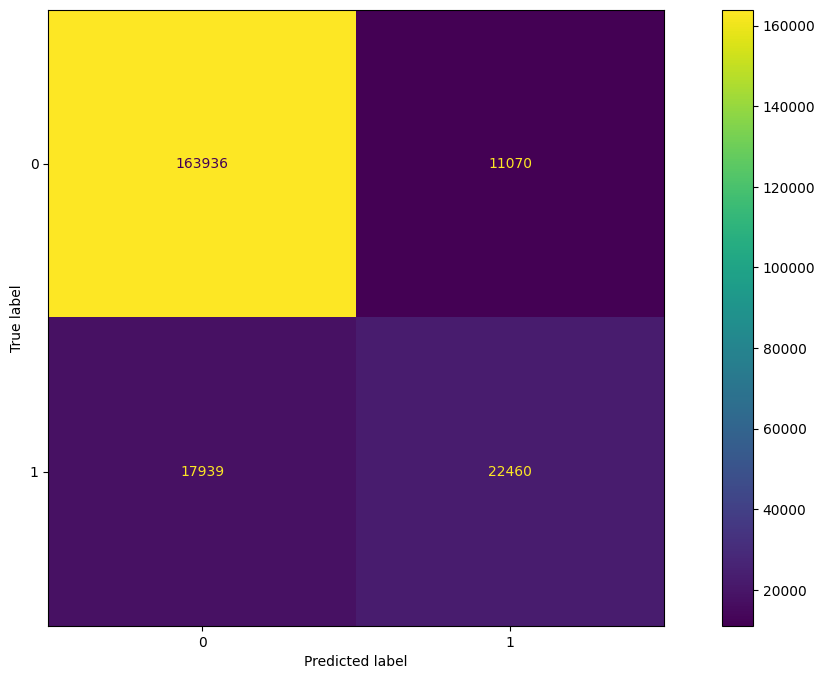

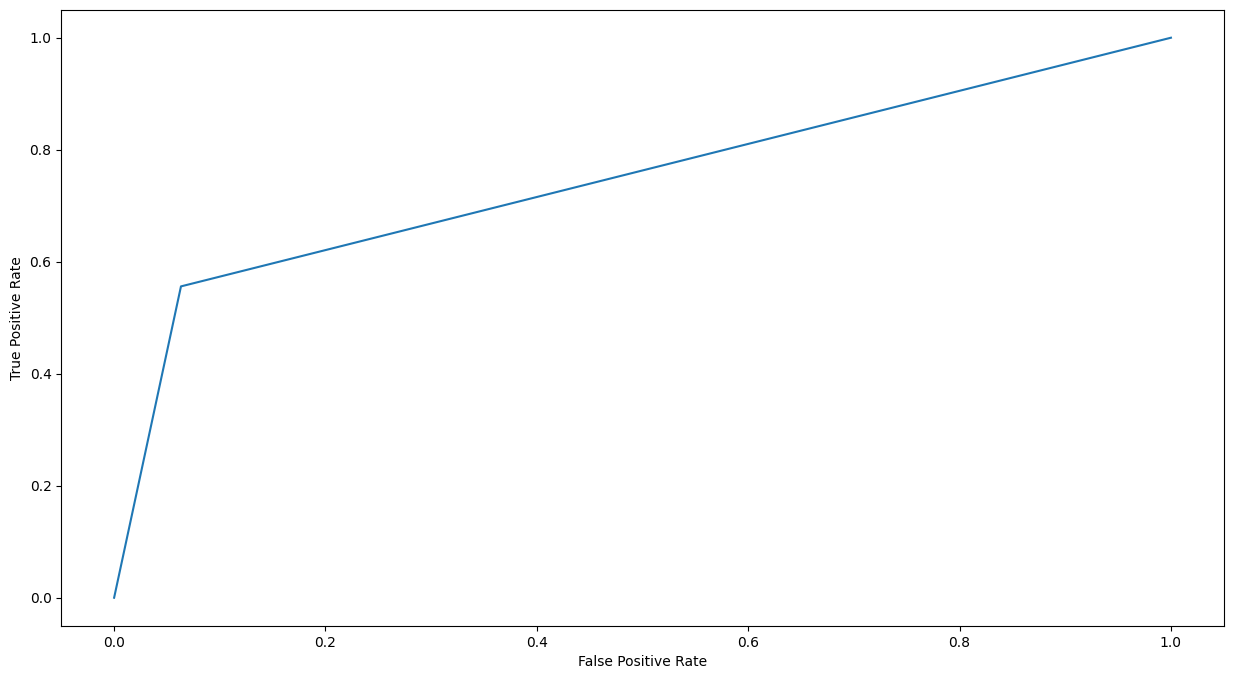



CatBoost AUC score: 0.7463496905953255


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


LightGBM Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92    175006
           1       0.67      0.55      0.61     40399

    accuracy                           0.87    215405
   macro avg       0.79      0.75      0.76    215405
weighted avg       0.86      0.87      0.86    215405
 

LightGBM Confusion Matrix: 
         0      1
0  164114  10892
1   18066  22333 



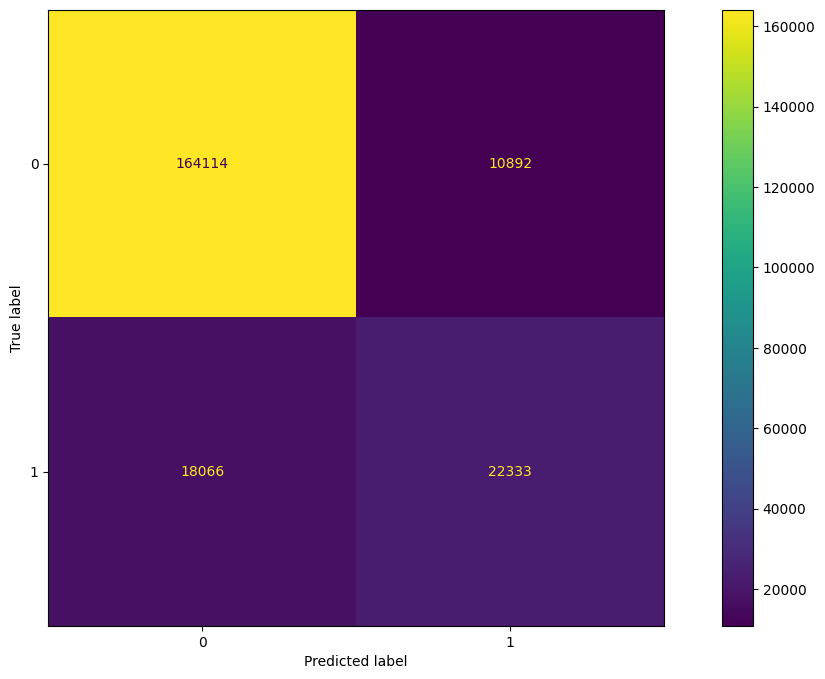

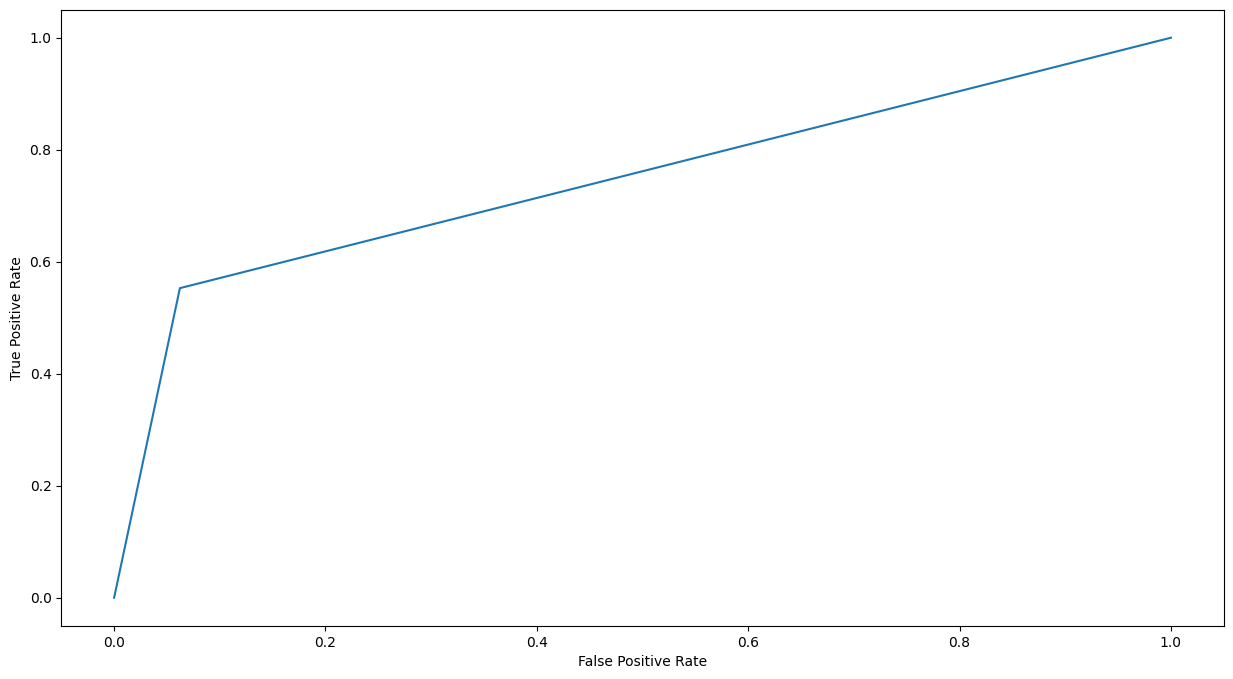



LightGBM AUC score: 0.7452864235030798


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


ada_boost Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92    175006
           1       0.66      0.57      0.61     40399

    accuracy                           0.86    215405
   macro avg       0.78      0.75      0.76    215405
weighted avg       0.86      0.86      0.86    215405
 

ada_boost Confusion Matrix: 
         0      1
0  162905  12101
1   17410  22989 



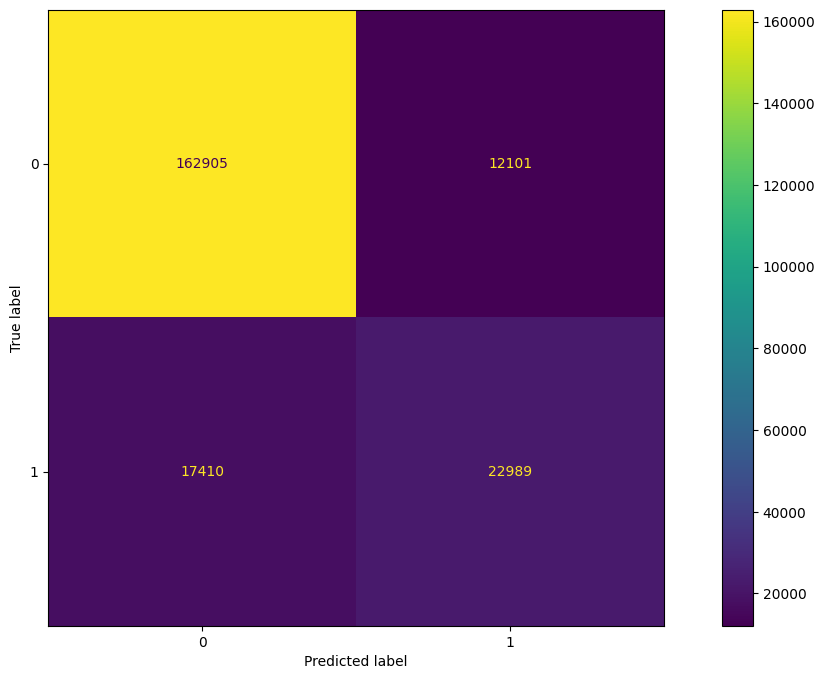

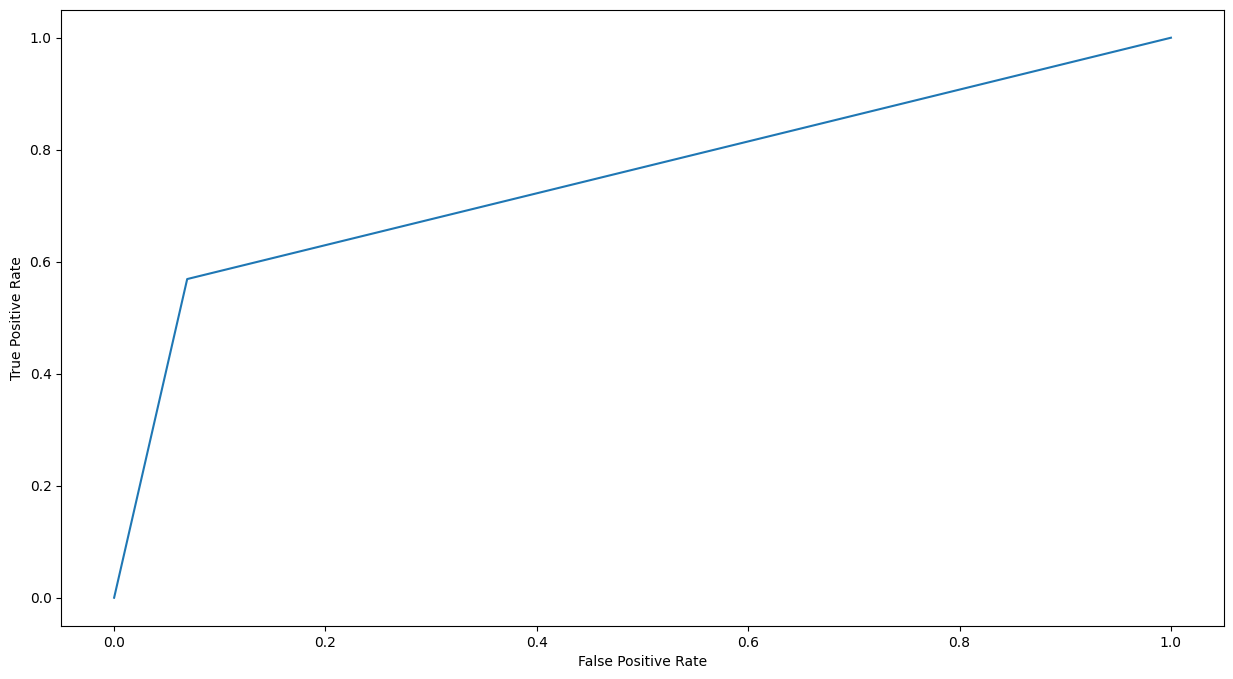



ada_boost AUC score: 0.7499512690642395


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 




,precision,recall,f1_score,accuracy,auc
model,,,,,
Logistic Regressor,0.616317,0.601550,0.608844,0.855036,0.757551
ada_boost,0.655144,0.569049,0.609069,0.862998,0.749951
Random Forest,0.648347,0.567366,0.605159,0.861145,0.748164
CatBoost,0.669848,0.555954,0.607610,0.865328,0.746350
XGBoost,0.670010,0.555657,0.607499,0.865337,0.746241
LightGBM,0.672175,0.552811,0.606677,0.865565,0.745286
Decision Tree,0.571281,0.587118,0.579091,0.839929,0.742704


In [ ]:
# Fit and evaluate the models
from sklearn import metrics
from sklearn.metrics import *
model_performances = classification_fit_and_score(unbalancedDt_models)
model_performances

With our model building on the unbalanced dataset, Logistic Regression performed bestb with a AUC score of 0.756525

#Pipeline for the chosen model

In [ ]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("estimator", log_reg_model)]
)

# 2nd Approach- Balancing of Data

In [ ]:
#copying train dataset
train = Train.copy()
train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,CHURN
0,K > 24 month,20000.0,47.0,21602.000000,7201.0,52.0,8835.0,3391.0,396.0,62,30.0,0
1,K > 24 month,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,3,5.0,0
2,K > 24 month,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,1,5.0,0
3,K > 24 month,7900.0,19.0,7896.000000,2632.0,25.0,9385.0,27.0,46.0,61,7.0,0
4,K > 24 month,12350.0,21.0,12351.000000,4117.0,29.0,9360.0,66.0,102.0,56,11.0,0


In [ ]:
#copying test dataset
test = Test.copy()
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK
0,I 18-21 month,2500.0,5.0,2500.000000,833.0,5.0,0.0,64.0,70.0,35,5.0
1,K > 24 month,3000.0,7.0,5486.233417,1000.0,9.0,265.0,27.0,28.0,2,5.0
2,K > 24 month,3000.0,7.0,5486.233417,1000.0,9.0,0.0,27.0,28.0,22,5.0
3,K > 24 month,3000.0,7.0,5486.233417,1000.0,9.0,265.0,27.0,28.0,6,5.0
4,K > 24 month,5100.0,7.0,5637.000000,1879.0,15.0,7783.0,30.0,24.0,60,4.0


# Encoding

In [ ]:
# Encode the TENURE column using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False,handle_unknown='error')


In [ ]:
#categorical encoding

train_encoding =  pd.DataFrame(ohe.fit_transform(train[['TENURE']]))
train_encoding.columns = ohe.get_feature_names_out(['TENURE'])
train.drop(['TENURE'] ,axis=1, inplace=True)
train_encoding=pd.DataFrame(train_encoding)


train_data= pd.concat([train, train_encoding ], axis=1)

train_data

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,CHURN,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,20000.0,47.0,21602.000000,7201.0,52.0,8835.0,3391.0,396.0,62,30.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,3,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,1,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7900.0,19.0,7896.000000,2632.0,25.0,9385.0,27.0,46.0,61,7.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12350.0,21.0,12351.000000,4117.0,29.0,9360.0,66.0,102.0,56,11.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,16,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077020,2500.0,5.0,2500.000000,833.0,5.0,0.0,15.0,77.0,34,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077021,3000.0,7.0,5506.050798,1000.0,9.0,258.0,27.0,29.0,3,5.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077022,600.0,1.0,600.000000,200.0,1.0,591.0,11.0,37.0,16,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Feature Scaling

In [ ]:

scaler = MinMaxScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

In [ ]:
train_data.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,CHURN,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,0.042512,0.353846,0.040590,0.040594,0.566667,0.005190,0.066740,0.032890,1.000000,0.046549,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.006341,0.046154,0.010344,0.005637,0.088889,0.000152,0.000531,0.002409,0.032787,0.006421,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.006341,0.046154,0.010344,0.005637,0.088889,0.000152,0.000531,0.002409,0.000000,0.006421,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.016767,0.138462,0.014835,0.014837,0.266667,0.005513,0.000531,0.003821,0.983607,0.009631,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.026235,0.153846,0.023207,0.023208,0.311111,0.005498,0.001299,0.008472,0.901639,0.016051,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Split data into Predictor and Response Variable

In [ ]:
# Split the training dataframe for the SMOTE balancing
X = train_data.drop(columns=["CHURN"])
y = train_data["CHURN"]

## smote sampling

In [ ]:
# Resample the training dataframe using SMOTE
smote = SMOTE(sampling_strategy="minority", random_state=24)
X, y = smote.fit_resample(X, y)
y.value_counts()

0    875031
1    875031
Name: CHURN, dtype: int64

## Split Data into Train and Test Data

In [ ]:
# Apply train_test_split to the SMOTE-sampled training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 24, stratify=y)
y_train.value_counts()

1    612522
0    612521
Name: CHURN, dtype: int64

# Model Building

In [ ]:
# Define the models
log_reg_model = LogisticRegression(random_state=24)
dt_model = DecisionTreeClassifier(random_state=24)
rf_model = RandomForestClassifier(random_state=24)
xgb_model = XGBClassifier(random_state=24)
catb_model = CatBoostClassifier(metric_period=100, random_state=24)
lgb_model = lgb.LGBMClassifier(random_state=24)
ada = AdaBoostClassifier(random_state = 24)
# Create a dictionary of the models
smote_models = {
    "Logistic Regressor": log_reg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "CatBoost": catb_model,
    "LightGBM": lgb_model,
    "ada_boost": ada
}

In [ ]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, X_train= X_train, X_test= X_test,
                                 y_train= y_train, y_test= y_test):

    # List to collect the results
    results = []

    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(X_train, y_train)

        # making predictions
        y_pred = model.predict(X_test)

        # Append model performance results
        results.append([
        name,
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        accuracy_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred)
        ])

        # Print Classification Report
        model_classification_report = classification_report(y_test, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report, "\n")

        # Defining the Confusion Matrix
        model_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred)).reset_index(drop=True)
        print(f"{name} Confusion Matrix:", "\n", model_confusion_matrix, "\n")

        # Visualizing the Confusion Matrix
        # Display Confusion Matrix directly from predictions
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()
        print("\n")

        # Calculate and show the AUC and ROC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        print("\n")

        print(f"{name} AUC score: {roc_auc_score(y_test, y_pred)}")

        print("\n")
        print("----- ----- "*6)
        print("\n")
        print("----- ----- "*6)
        print("\n")

    # Put the results together
    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_score", "accuracy", "auc"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["auc","f1_score", "accuracy", "recall"], ascending = False, inplace = True)

    return eval_df

Logistic Regressor Model Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.76      0.82    262510
           1       0.79      0.91      0.84    262509

    accuracy                           0.83    525019
   macro avg       0.84      0.83      0.83    525019
weighted avg       0.84      0.83      0.83    525019
 

Logistic Regressor Confusion Matrix: 
         0       1
0  198763   63747
1   24218  238291 



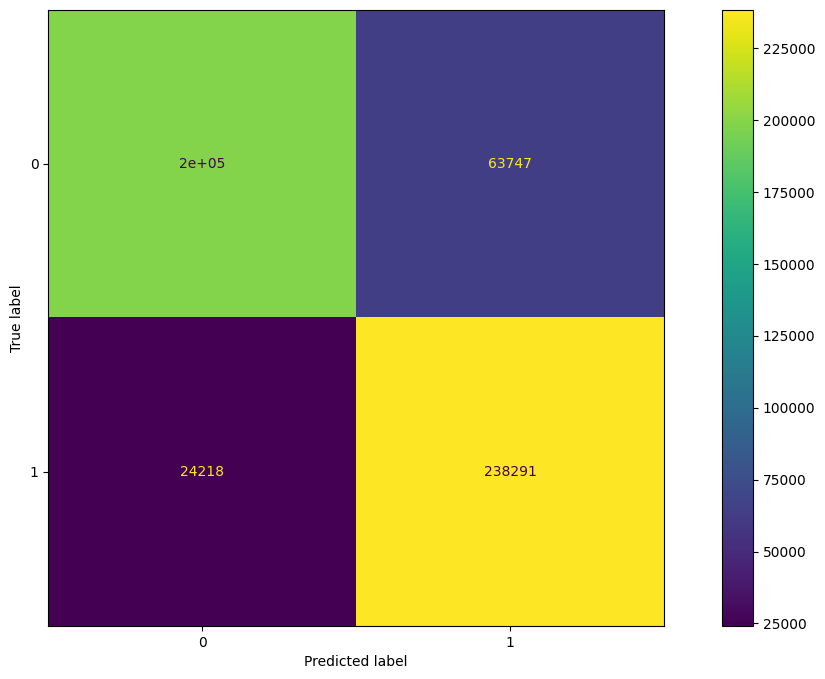

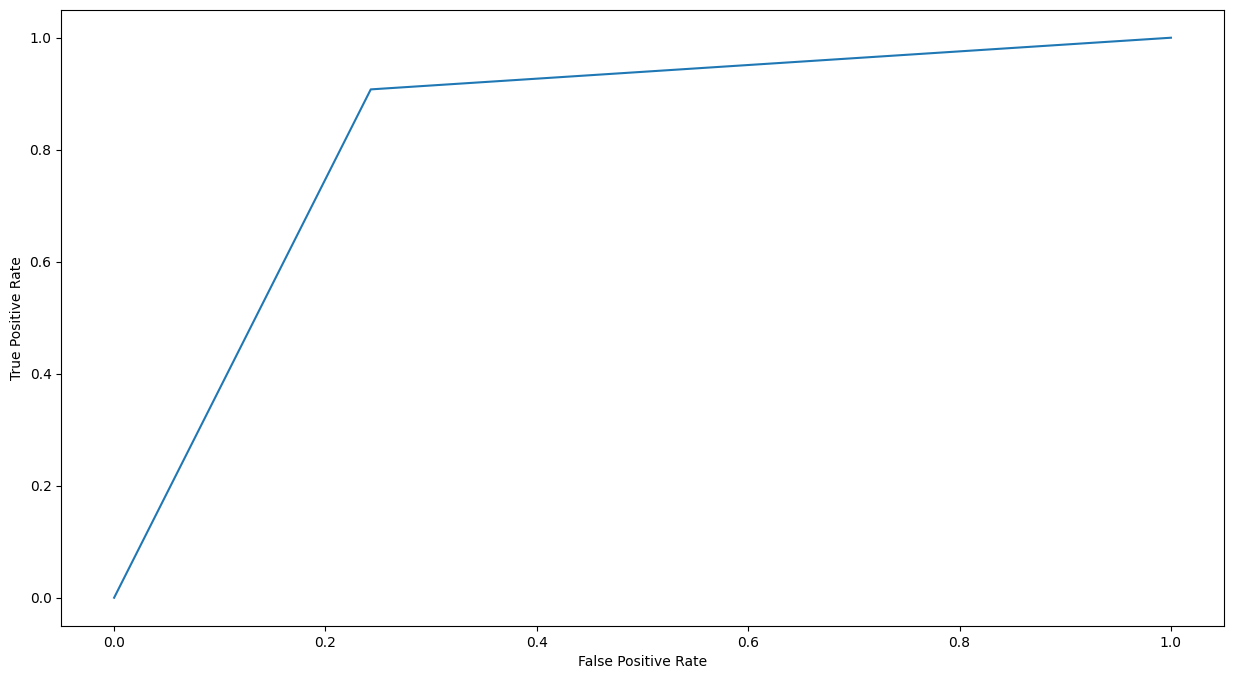



Logistic Regressor AUC score: 0.8324538260335137


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Decision Tree Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89    262510
           1       0.87      0.91      0.89    262509

    accuracy                           0.89    525019
   macro avg       0.89      0.89      0.89    525019
weighted avg       0.89      0.89      0.89    525019
 

Decision Tree Confusion Matrix: 
         0       1
0  227209   35301
1   23655  238854 



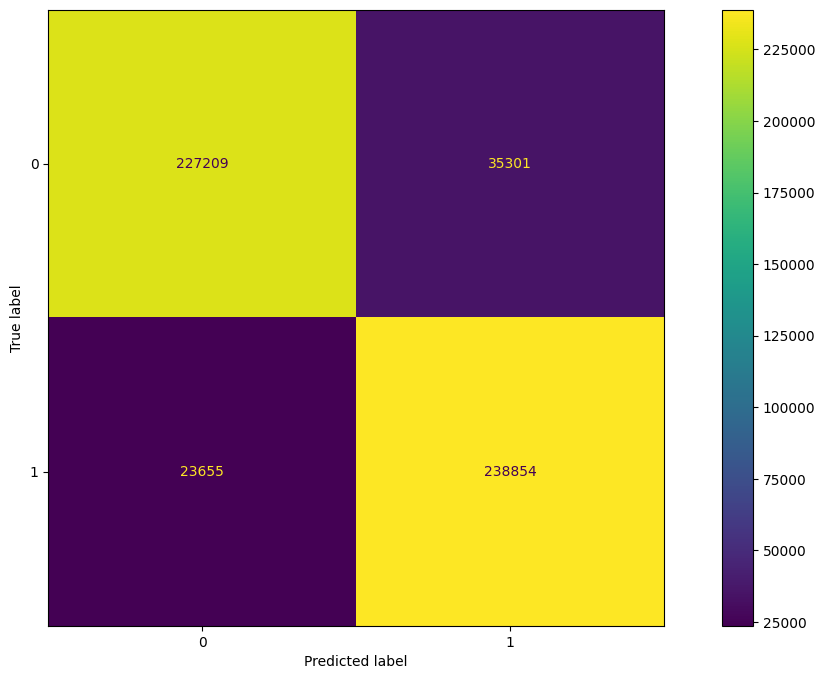

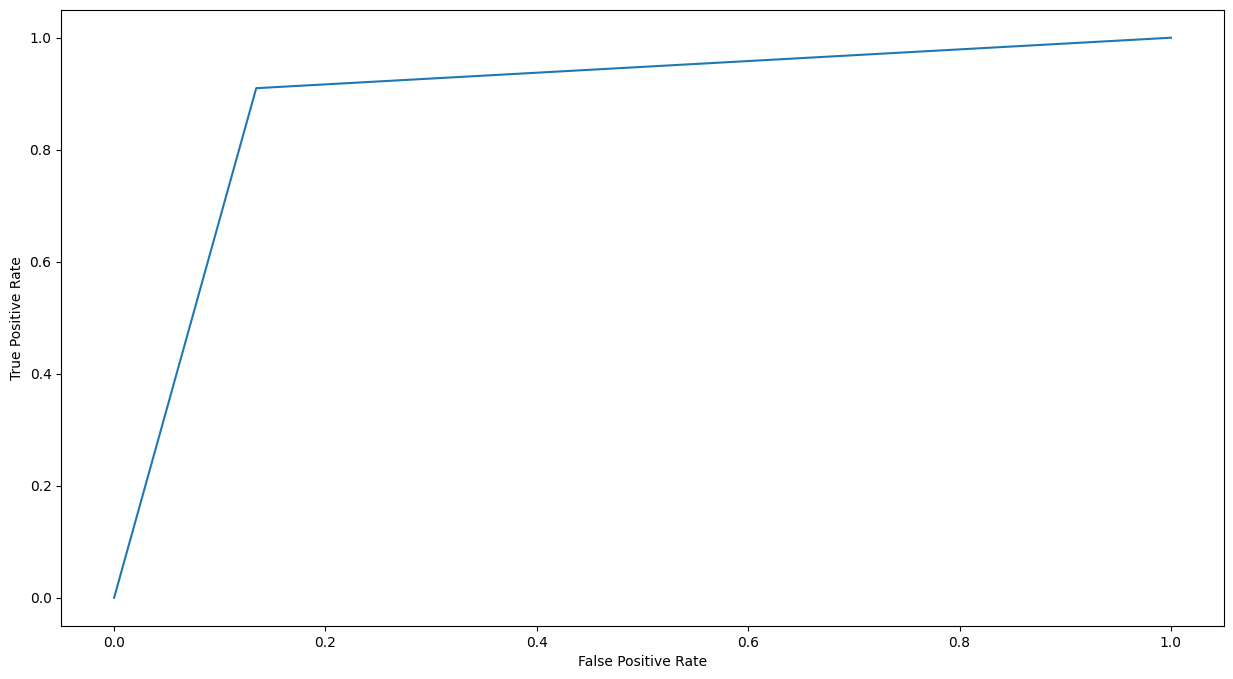



Decision Tree AUC score: 0.8877069633324517


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Random Forest Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90    262510
           1       0.90      0.91      0.90    262509

    accuracy                           0.90    525019
   macro avg       0.90      0.90      0.90    525019
weighted avg       0.90      0.90      0.90    525019
 

Random Forest Confusion Matrix: 
         0       1
0  235452   27058
1   24090  238419 



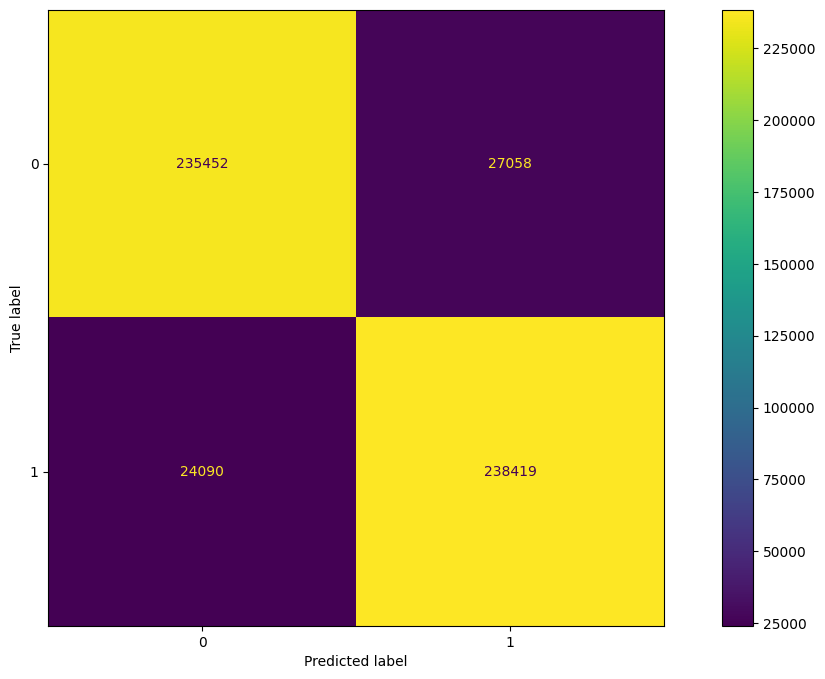

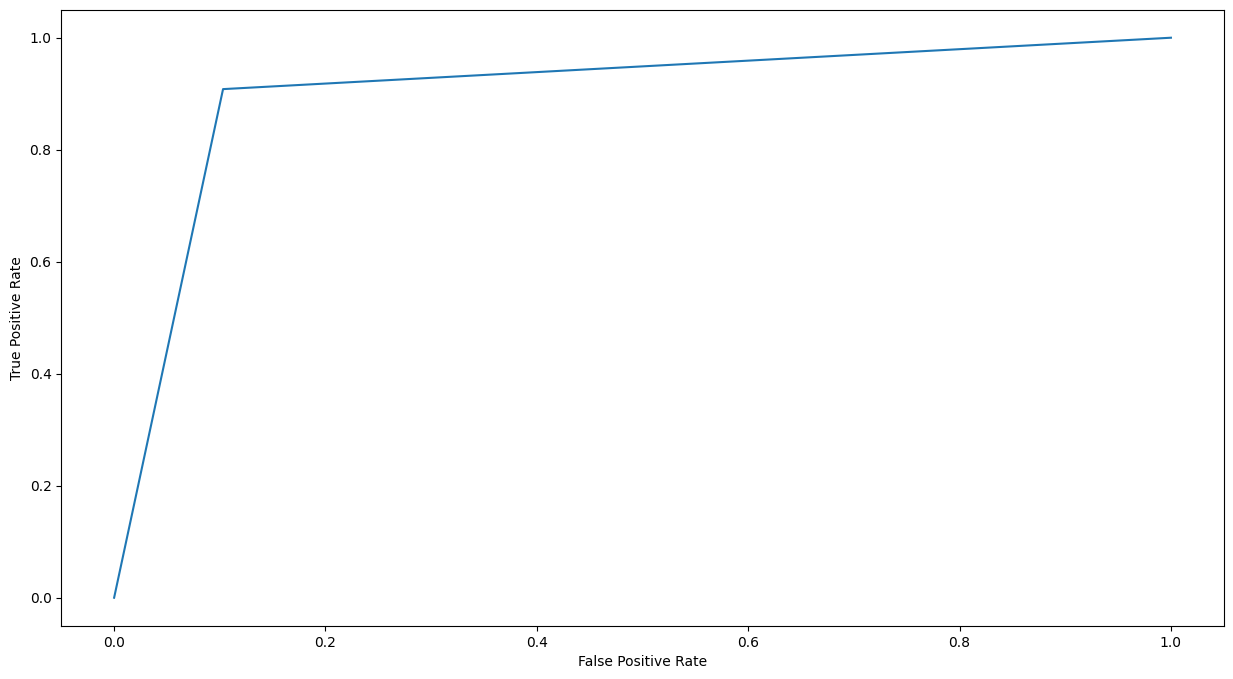



Random Forest AUC score: 0.9025787745832878


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91    262510
           1       0.90      0.92      0.91    262509

    accuracy                           0.91    525019
   macro avg       0.91      0.91      0.91    525019
weighted avg       0.91      0.91      0.91    525019
 

XGBoost Confusion Matrix: 
         0       1
0  235743   26767
1   22267  240242 



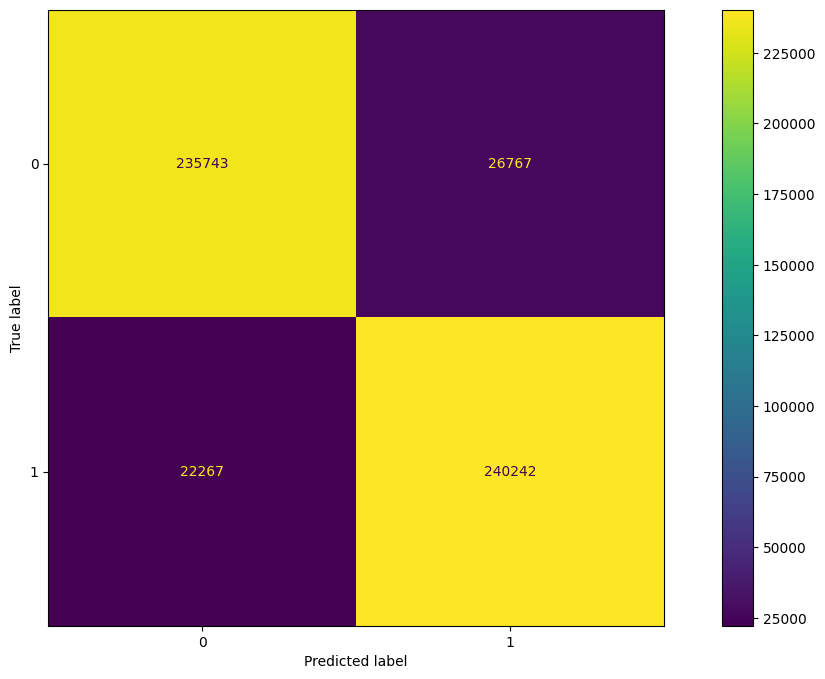

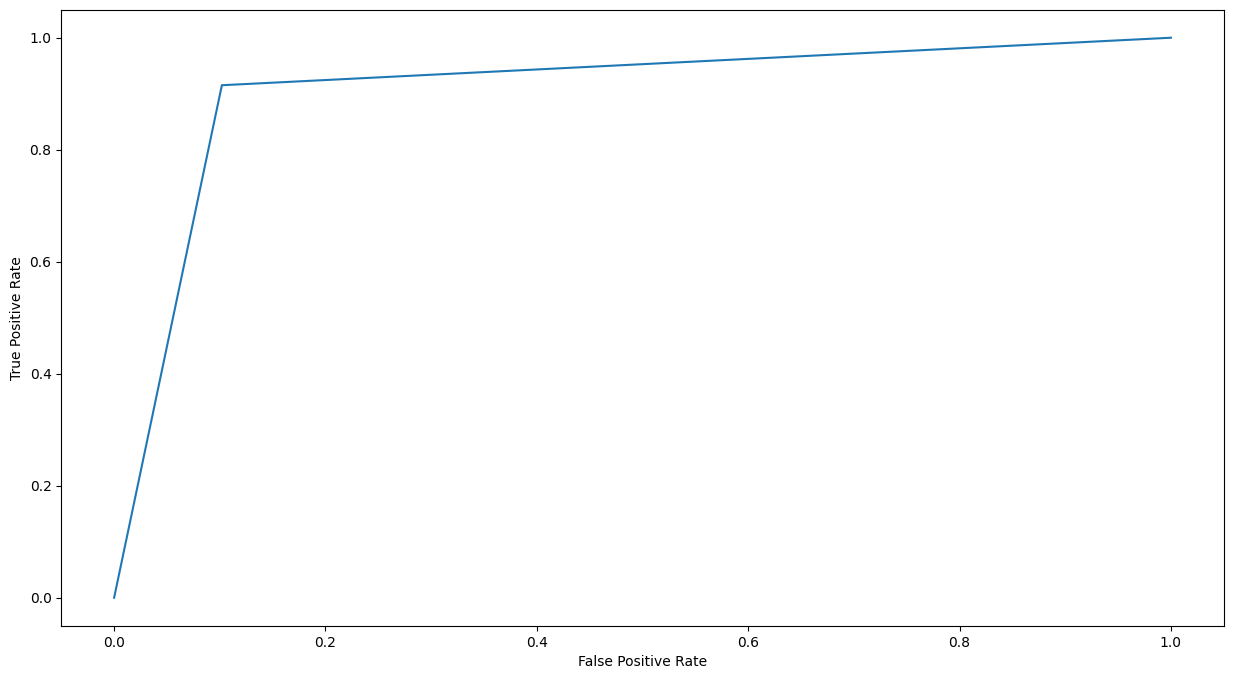



XGBoost AUC score: 0.906605301086133


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Learning rate set to 0.214573
0:	learn: 0.5462337	total: 317ms	remaining: 5m 17s
100:	learn: 0.2228608	total: 36.9s	remaining: 5m 28s
200:	learn: 0.2162685	total: 1m 9s	remaining: 4m 38s
300:	learn: 0.2143472	total: 1m 47s	remaining: 4m 9s
400:	learn: 0.2131093	total: 2m 23s	remaining: 3m 34s
500:	learn: 0.2119192	total: 2m 54s	remaining: 2m 54s
600:	learn: 0.2110664	total: 3m 26s	remaining: 2m 17s
700:	learn: 0.2103632	total: 4m	remaining: 1m 42s
800:	learn: 0.2097742	total: 4m 32s	remaining: 1m 7s
900:	learn: 0.2091342	total: 5m 4s	remaining: 33.4s
999:	learn: 0.2085936	total: 5m 36s	remaining: 0us
CatBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91    262510
           1       0.91      0.91      0.91    262509

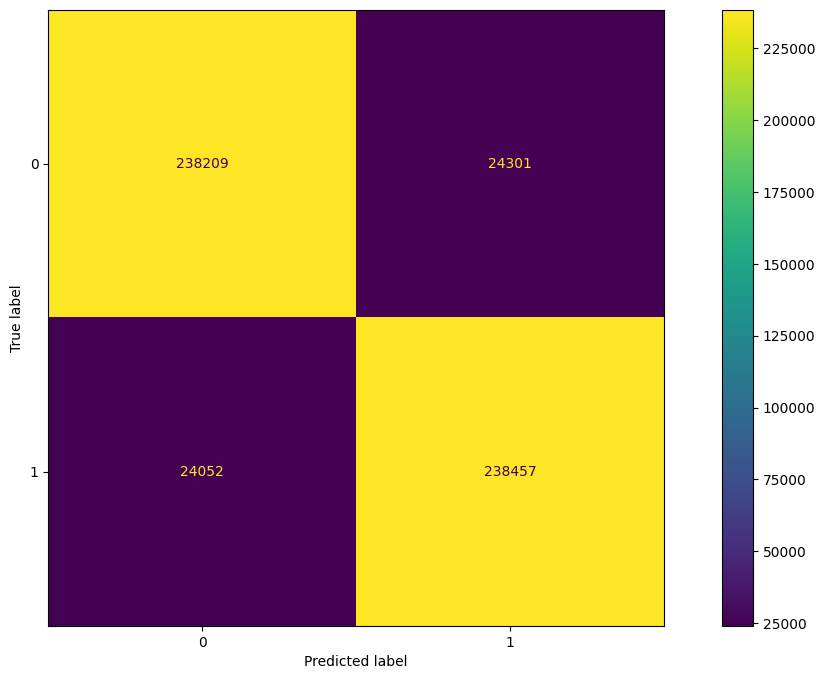

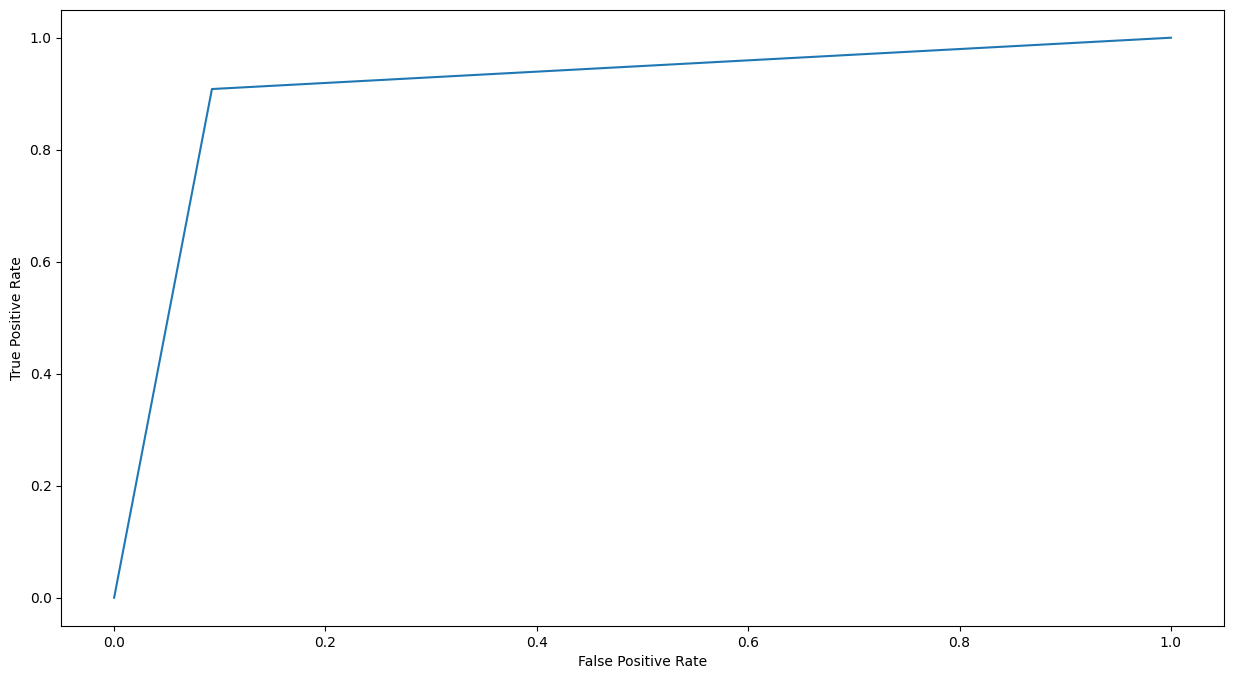



CatBoost AUC score: 0.9079023815787487


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


LightGBM Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90    262510
           1       0.90      0.91      0.90    262509

    accuracy                           0.90    525019
   macro avg       0.90      0.90      0.90    525019
weighted avg       0.90      0.90      0.90    525019
 

LightGBM Confusion Matrix: 
         0       1
0  235775   26735
1   24332  238177 



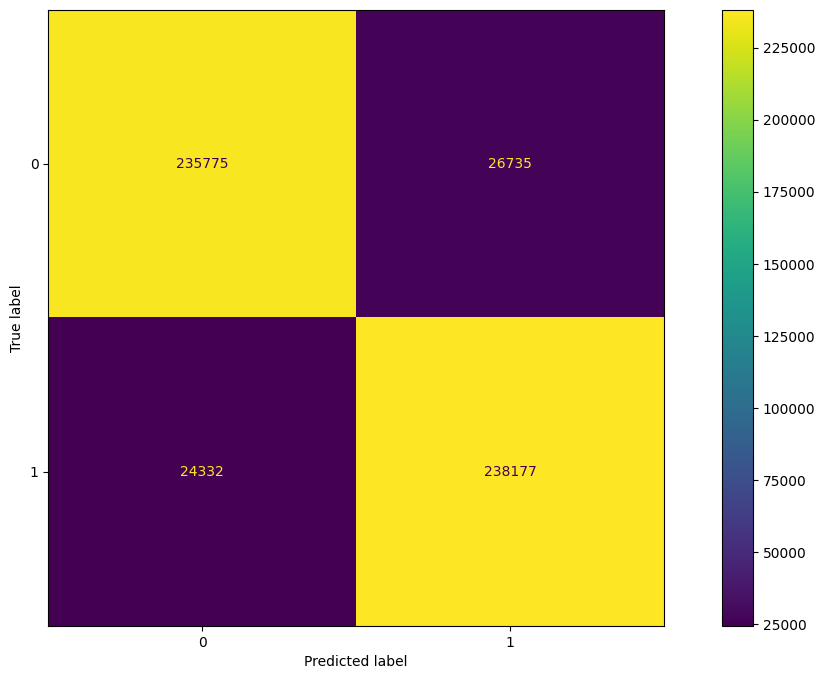

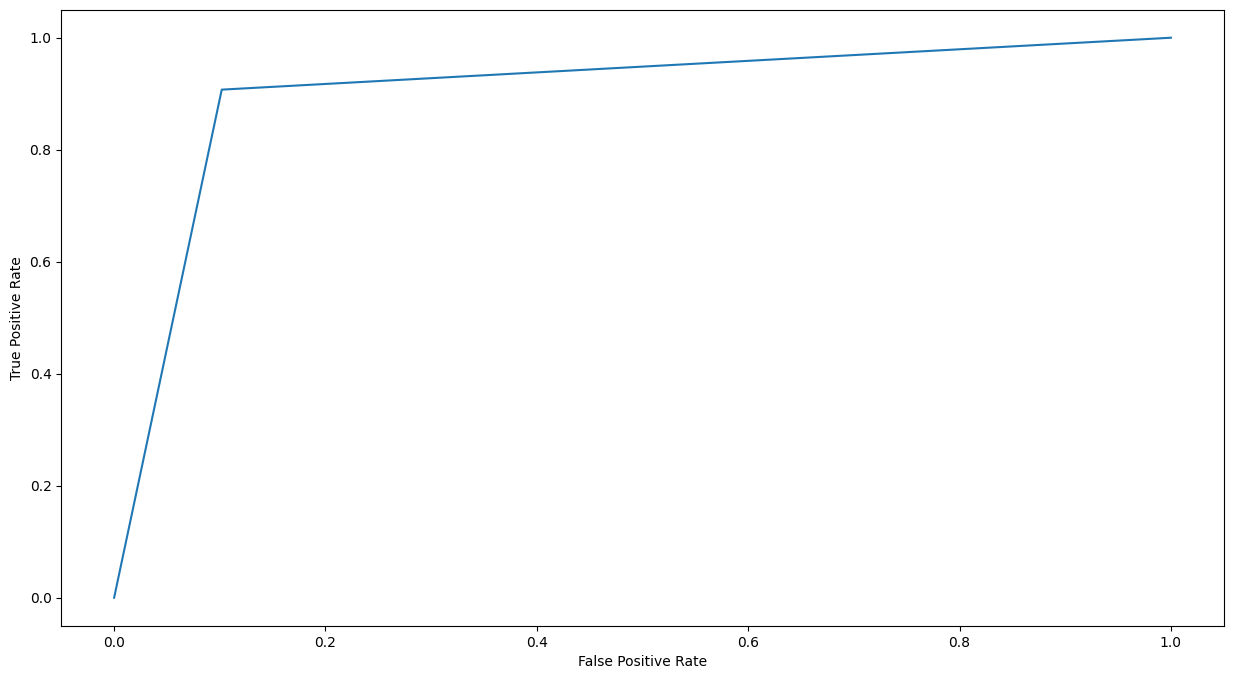



LightGBM AUC score: 0.9027330526643644


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


ada_boost Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86    262510
           1       0.83      0.91      0.87    262509

    accuracy                           0.86    525019
   macro avg       0.87      0.86      0.86    525019
weighted avg       0.87      0.86      0.86    525019
 

ada_boost Confusion Matrix: 
         0       1
0  215131   47379
1   24745  237764 



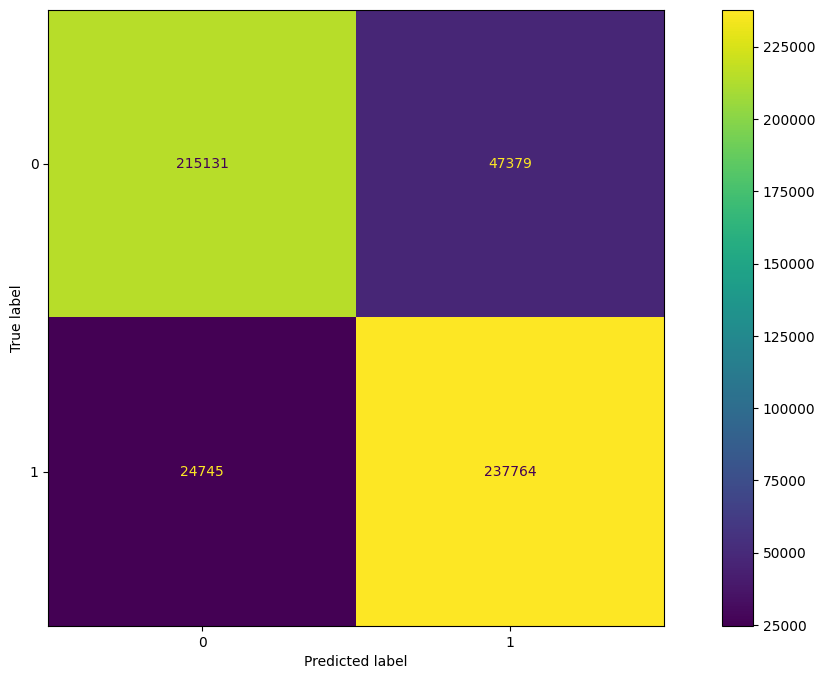

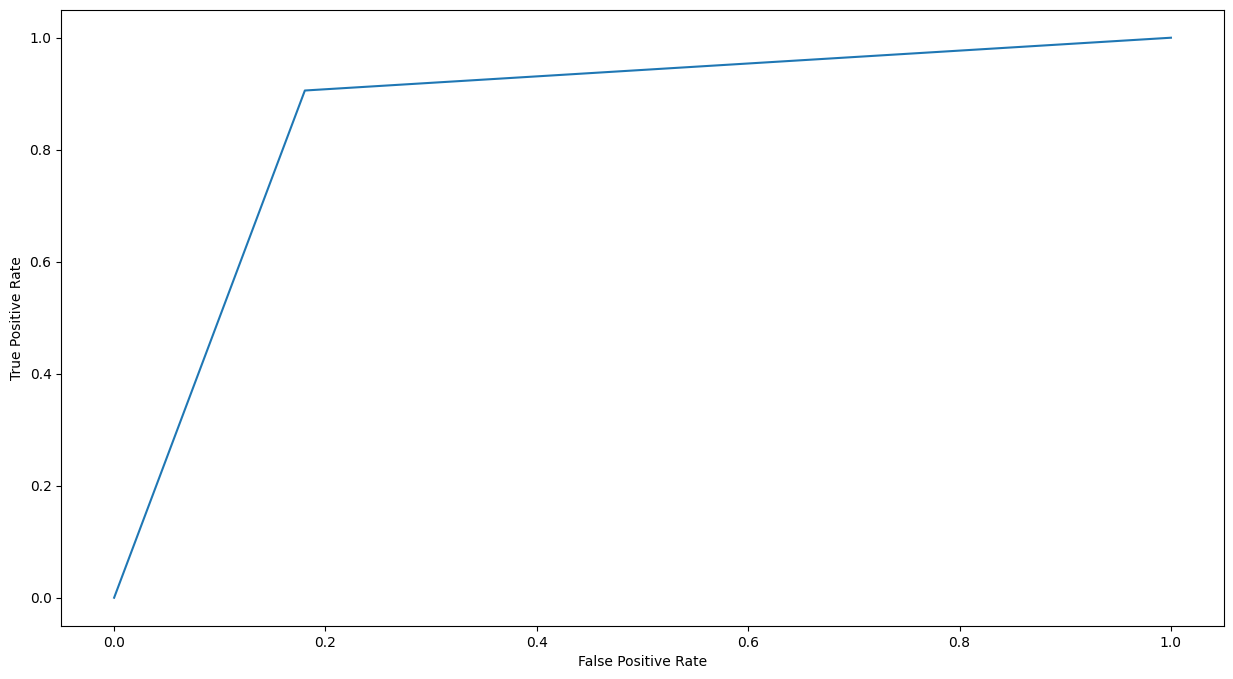



ada_boost AUC score: 0.8626260061265575


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 




,precision,recall,f1_score,accuracy,auc
model,,,,,
CatBoost,0.907516,0.908376,0.907946,0.907902,0.907902
XGBoost,0.899752,0.915176,0.907399,0.906605,0.906605
LightGBM,0.899080,0.907310,0.903176,0.902733,0.902733
Random Forest,0.898078,0.908232,0.903126,0.902579,0.902579
Decision Tree,0.871237,0.909889,0.890144,0.887707,0.887707
ada_boost,0.833841,0.905737,0.868303,0.862626,0.862626
Logistic Regressor,0.788944,0.907744,0.844185,0.832454,0.832454


In [ ]:
# Fit and evaluate the models
from sklearn import metrics
from sklearn.metrics import *
model_performances = classification_fit_and_score(smote_models)
model_performances

In [ ]:
cat_model = CatBoostClassifier(metric_period=100, random_state=24)

In [ ]:
params = {'iterations':5000,
        'learning_rate':0.001,
        'depth':3,
        'random_state':24,
        # 'loss_function':'AUC',
        'eval_metric':'AUC',
        'metric_period':100,
        'od_type':"Iter",
        'od_wait':20,
        'verbose':True}
        #'use_best_model':True}


cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8765770	best: 0.8765770 (0)	total: 328ms	remaining: 27m 21s
100:	test: 0.9058887	best: 0.9058887 (100)	total: 29.7s	remaining: 24m 2s
200:	test: 0.9071963	best: 0.9071963 (200)	total: 59.7s	remaining: 23m 45s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.9072733352
bestIteration = 209

Shrink model to first 210 iterations.


# creating a pipeline

In [ ]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()
cat_cols = train.select_dtypes(exclude=np.number).columns.tolist()



In [ ]:
train = Train.copy()

In [ ]:

categorical_features = ['TENURE']
# features = [feat for feat in list(train)
#             if feat != 'CHURN']
# categorical_features = np.where(train[features].dtypes != np.float)[0]
 # Pipeline for the Categorical features
encoder_categories = [ train[categorical_features[i] ].append( test[categorical_features[i] ] ).dropna().unique() for i in range(len(categorical_features) )]

categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = "most_frequent"
          )),
        ('ohe', preprocessing.OneHotEncoder(categories=encoder_categories,handle_unknown = 'ignore',drop='first', sparse=False))
    ]
)

In [ ]:


# pipeline for numerical features
numeric_features =['MONTANT', 'FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','ORANGE','REGULARITY','FREQ_TOP_PACK']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'mean')),
        ('scaler',  MinMaxScaler())
    ]
)

In [ ]:
# Associate the two pipelines
preprocessor = ColumnTransformer(
    [
          ("num", numeric_transformer, selector(dtype_include="number")),
         ("cat", categorical_transformer, selector(dtype_exclude="number")),
    ],

)

In [ ]:
# putting the preprocessiong workflow in a pipeline
pipe_1 = Pipeline(
    steps=[("preprocessor", preprocessor), ("estimator", cat_model)]
)

In [ ]:
pipe_1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f348e116440>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(categories=[array(['K > 24 month', 'E 6-9 month', 'H 15-18 month', 'G 12-15 month',
       'I 18-21 month', 'J 21-24 month', 'F 9-12 month', 'D 3-6 month'],
      dtype=object)],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f348e1147f0>)])),
                ('estimator',
                 <catboost.core.CatBoostClassifier object at 0x7f348e0e5570>)])

In [ ]:
#fit on unbalanced dataset
X = Train.drop(['CHURN'], axis=1)
y = Train.CHURN

pipe_1.fit(X,y)

0:	total: 218ms	remaining: 18m 8s
100:	total: 19.3s	remaining: 15m 34s
200:	total: 38.8s	remaining: 15m 26s
300:	total: 1m	remaining: 15m 41s
400:	total: 1m 19s	remaining: 15m 16s
500:	total: 1m 40s	remaining: 15m 1s
600:	total: 2m 1s	remaining: 14m 49s
700:	total: 2m 20s	remaining: 14m 24s
800:	total: 2m 41s	remaining: 14m 5s
900:	total: 3m 1s	remaining: 13m 47s
1000:	total: 3m 21s	remaining: 13m 24s
1100:	total: 3m 41s	remaining: 13m 4s
1200:	total: 4m 2s	remaining: 12m 47s
1300:	total: 4m 21s	remaining: 12m 24s
1400:	total: 4m 41s	remaining: 12m 2s
1500:	total: 5m 2s	remaining: 11m 45s
1600:	total: 5m 21s	remaining: 11m 23s
1700:	total: 5m 40s	remaining: 11m 1s
1800:	total: 6m 1s	remaining: 10m 42s
1900:	total: 6m 20s	remaining: 10m 21s
2000:	total: 6m 39s	remaining: 9m 59s
2100:	total: 6m 59s	remaining: 9m 38s
2200:	total: 7m 20s	remaining: 9m 19s
2300:	total: 7m 39s	remaining: 8m 58s
2400:	total: 7m 58s	remaining: 8m 37s
2500:	total: 8m 19s	remaining: 8m 18s
2600:	total: 8m 38s	re

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f348e116440>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(categories=[array(['K > 24 month', 'E 6-9 month', 'H 15-18 month', 'G 12-15 month',
       'I 18-21 month', 'J 21-24 month', 'F 9-12 month', 'D 3-6 month'],
      dtype=object)],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f348e1147f0>)])),
                ('estimator',
                 <catboost.core.CatBoostClassifier object at 0x7f348e0e5570>)])

# Model Interpretability

In [ ]:
from catboost import CatBoostClassifier, Pool
shap_values = cat_model.get_feature_importance(Pool(X_test, label=y_test) ,
                                               type="ShapValues")

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_test.iloc[0,:])

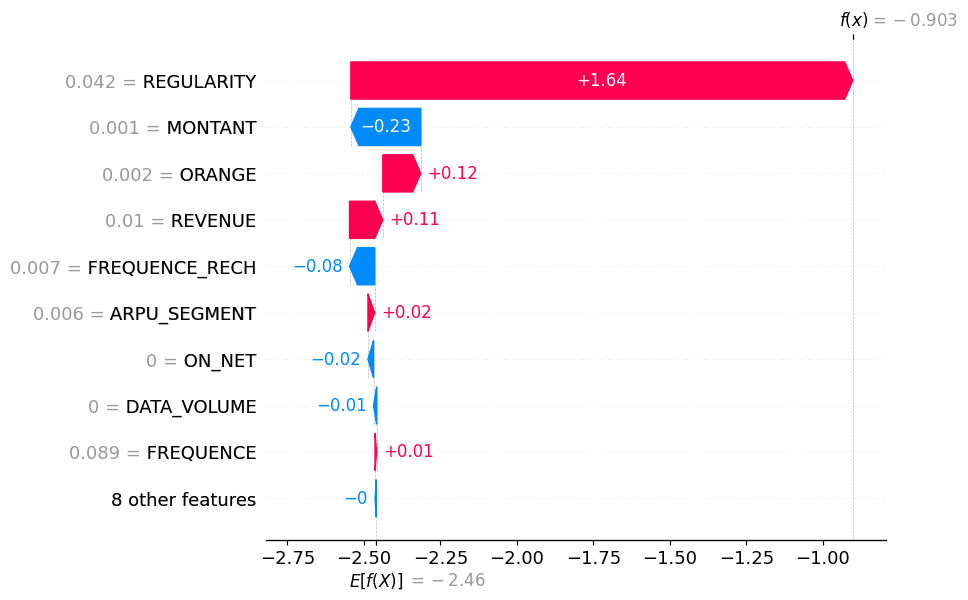

In [ ]:
import shap
explainer = shap.Explainer(cat_model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

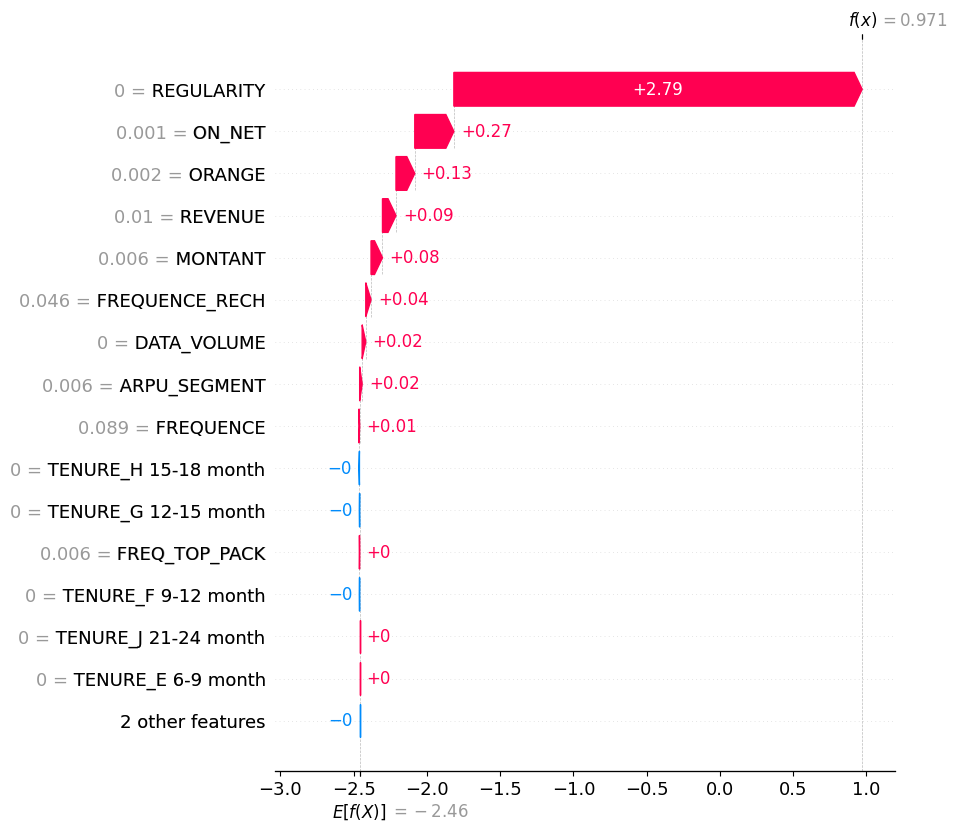

In [ ]:
shap.plots.waterfall(shap_values[1], max_display=16)

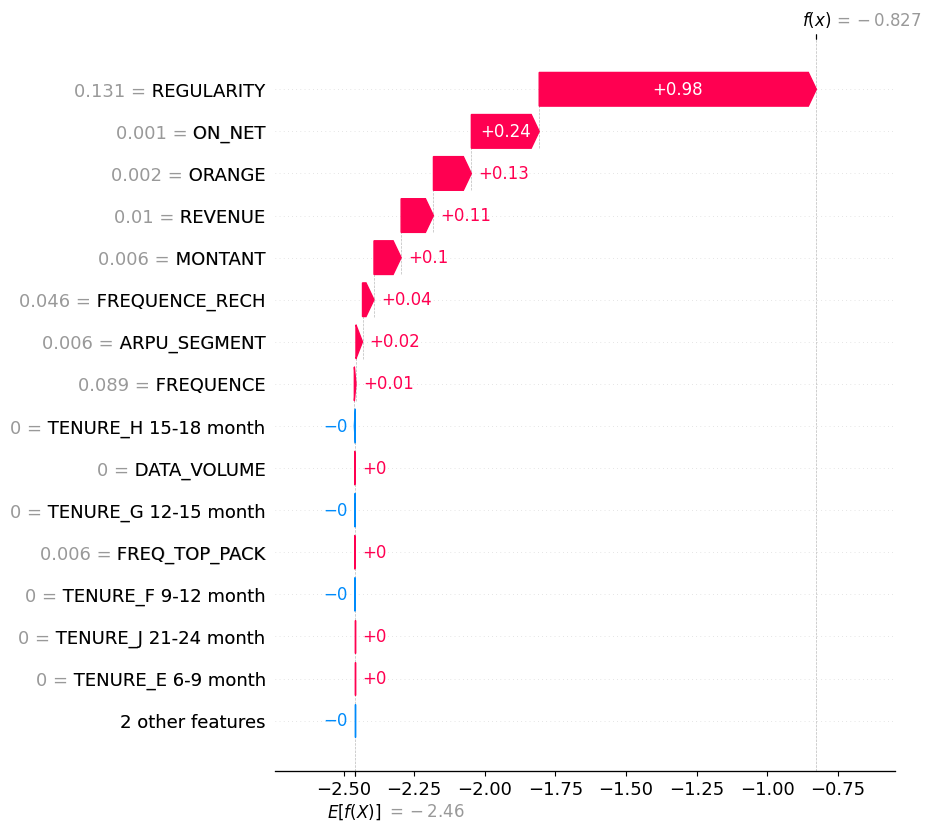

In [ ]:
shap.plots.waterfall(shap_values[2], max_display=16)

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

In [ ]:
# visualize the the second prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[1])

In [ ]:
edtgedsyd

In [ ]:
# visualize all the training set predictions
shap.initjs()
shap.plots.force(shap_values)

Applying the chosen model on the test dataset

In [ ]:
test_pred = pipe_1.predict(Test)

### Getting the same prediction format as the sample_submission file

In [ ]:
submission.head()

In [ ]:
#prediction
submission['CHURN'] = test_pred
submission['CHURN']

In [ ]:
# Making the user_id a dataframe
Passe= submission['user_id']
pass_df=  pd.DataFrame(Passe)
pass_df

In [ ]:
prediction = submission['CHURN']


In [ ]:
prediction

In [ ]:
#dataframe for predictions
sub=pd.DataFrame(prediction)
sub

In [ ]:
# joining the user_id with the prediction
final_sub = pass_df.join(sub,how = 'left')
final_sub

In [ ]:
#saving our final predictions
final_sub.to_csv("predicted3_1_sub.csv", index=False)

# EXPORTING MODEL

In [ ]:
ml = {'pipeline':pipe_1,
      'numeric_columns': numeric_features,
      'categorical_columns': categorical_features,}

In [ ]:
import pickle
with open("ml_comps_1.pkl", 'wb') as file:
    pickle.dump(ml, file)

In [ ]:
with open('ml_comps_1.pkl', 'rb') as file:
    loaded_object = pickle.load(file)

In [ ]:
 loaded_object